# **W6W7W8 Python Assignment**

# Data Overview

There are 4 data that we used in this Python Assignment :
1. [Users](https://docs.google.com/spreadsheets/d/1FWiPXhn07cdO1nqOWoz8VqphDoExT1f3qZoAQUJc5E0/edit#gid=1643200062)
2. [daily user balance](https://docs.google.com/spreadsheets/d/1IgJCj7v9gs1Yc8KwvIrJfxcE-SBhufqA_EuJVvh7y4k/edit#gid=21227617)

# Import Library

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster                     # library that contains algorithms for segmenting
from silhoutte import silhoutte_analysis 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Load Data

## **I. Users Dataset**

**DATA DICTIONARY - Users Dataset**
*   **user_id** : Client ID on the platform
*   **register_import_datetime** : user register date for the first time
*   **user_gender** : gender of user
*   **age** : age of user
*   **user_occupation** : user's occupation
*   **user_income_range** : user's income range
*   **referral_code_used** : user's referral code used
*   **user_income_source** : user's income source


In [2]:
# input user data URL
user_url = 'https://docs.google.com/spreadsheets/d/1FWiPXhn07cdO1nqOWoz8VqphDoExT1f3qZoAQUJc5E0/edit#gid=1643200062'
user_url_trf1 = user_url.replace('/edit#gid=', '/export?format=csv&gid=')
# Load user Dataset
df1 = pd.read_csv(user_url_trf1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


### **I.  Clean Users Dataset**

## **II. Transactions Dataset**

**DATA DICTIONARY - Daily User Balance Sept 2021**
*   **user_id** : Client ID on the platform
*   **date** : Date of the user balance
*   **Saham_AUM** : AUM of equity mutual fund held by client to date
*   **Saham_invested_amount** : The total price paid by client to buy equity mutual fund to date.
*   **Saham_transaction_amount** : Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Pasar_Uang_AUM** : AUM of money market mutual fund held by client to date
*   **Pasar_Uang_invested_amount** : The total price paid by client to buy money market mutual fund to date
*   **Pasar_Uang_transaction_amount** : Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Pendapatan_Tetap_AUM** : AUM of fixed income mutual fund held by client to date
*   **Pendapatan_Tetap_invested_amount** : The total price paid by client to buy fixed income mutual fund to date
*   **Pendapatan_Tetap_transaction_amount** : Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   **Campuran_AUM** : AUM of mixed mutual fund held by client to date
*   **Campuran_invested_amount** : The total price paid by client to buy mixed mutual fund to date
*   **Campuran_transaction_amount** : Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

In [3]:
# input user data URL
user_url = 'https://docs.google.com/spreadsheets/d/1IgJCj7v9gs1Yc8KwvIrJfxcE-SBhufqA_EuJVvh7y4k/edit#gid=21227617'
user_url_trf2 = user_url.replace('/edit#gid=', '/export?format=csv&gid=')

df2 = pd.read_csv(user_url_trf2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [4]:
#i replace null value to '0' to make it easy to read and do the descriptive analysis 
list_fillna = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']

df2[list_fillna] = df2[list_fillna].fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            158811 non-null  float64
 3   Saham_invested_amount                158811 non-null  float64
 4   Saham_transaction_amount             158811 non-null  float64
 5   Pasar_Uang_AUM                       158811 non-null  float64
 6   Pasar_Uang_invested_amount           158811 non-null  float64
 7   Pasar_Uang_transaction_amount        158811 non-null  float64
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  158811 non-null  float64
 11  Campuran_AUM 

### **I.  Saham**

I check every Outliers only in transaction amount columns for each mutual funds, because if I clean in transaction amount the other amount such as AUM and invested amount will be clean either 

In [5]:
# exclude zero values in saham transaction
a = df2['Saham_transaction_amount'] != 0
saham_trans = df2.loc[a]

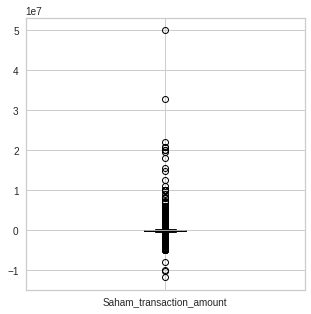

In [6]:
# create visual
saham_trans.boxplot(column=['Saham_transaction_amount'],figsize=(5,5))

In [7]:
# IQR calculation
Q1_saham = saham_trans['Saham_transaction_amount'].quantile(0.25)
Q3_saham = saham_trans['Saham_transaction_amount'].quantile(0.75)
IQR_saham = Q3_saham - Q1_saham
lower_fence_saham = Q1_saham - 1.5*IQR_saham
upper_fence_saham = Q3_saham + 1.5*IQR_saham

# call and print the calculation
print('Q1:', Q1_saham)
print('Q3:', Q3_saham)
print('IQR:', IQR_saham)
print('lower fence', lower_fence_saham)
print('upper fence', upper_fence_saham)

Q1: -40000.0
Q3: 150110.0
IQR: 190110.0
lower fence -325165.0
upper fence 435275.0


### **II.  Pasar Uang**

In [8]:
# exclude zero values in Pasar Uang transaction
b = df2['Pasar_Uang_transaction_amount'] != 0
pasar_uang_trans = df2.loc[b]

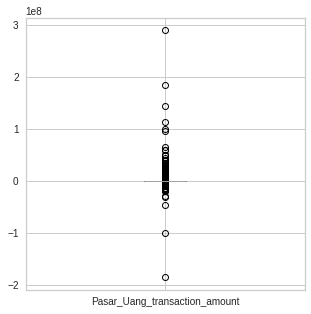

In [9]:
# create visual
pasar_uang_trans.boxplot(column=['Pasar_Uang_transaction_amount'],figsize=(5,5))

In [10]:
# IQR calculation
Q1_pasar_uang = pasar_uang_trans['Pasar_Uang_transaction_amount'].quantile(0.25)
Q3_pasar_uang = pasar_uang_trans['Pasar_Uang_transaction_amount'].quantile(0.75)
IQR_pasar_uang = Q3_pasar_uang - Q1_pasar_uang
lower_fence_pasar_uang = Q1_pasar_uang - 1.5*IQR_pasar_uang
upper_fence_pasar_uang = Q3_pasar_uang + 1.5*IQR_pasar_uang

# call and print the calculation
print('Q1:', Q1_pasar_uang)
print('Q3:', Q3_pasar_uang)
print('IQR:', IQR_pasar_uang)
print('lower fence', lower_fence_pasar_uang)
print('upper fence', upper_fence_pasar_uang)

Q1: -10000.0
Q3: 100000.0
IQR: 110000.0
lower fence -175000.0
upper fence 265000.0


### **III.  Pendapatan Tetap**

In [11]:
# exclude zero values in Pendapatan Tetap transaction
c = df2['Pendapatan_Tetap_transaction_amount'] != 0
pendapatan_tetap_trans = df2.loc[c]

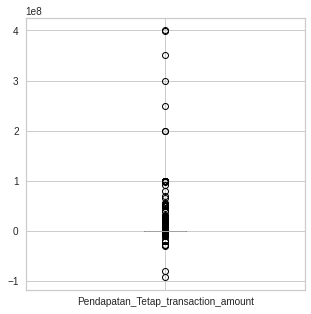

In [12]:
# create visual
pendapatan_tetap_trans.boxplot(column=['Pendapatan_Tetap_transaction_amount'],figsize=(5,5))

In [13]:
# IQR calculation
Q1_pendapatan_tetap = pendapatan_tetap_trans['Pendapatan_Tetap_transaction_amount'].quantile(0.25)
Q3_pendapatan_tetap = pendapatan_tetap_trans['Pendapatan_Tetap_transaction_amount'].quantile(0.75)
IQR_pendapatan_tetap = Q3_pendapatan_tetap - Q1_pendapatan_tetap
lower_fence_pendapatan_tetap = Q1_pendapatan_tetap - 1.5*IQR_pendapatan_tetap
upper_fence_pendapatan_tetap = Q3_pendapatan_tetap + 1.5*IQR_pendapatan_tetap

# call and print the calculation
print('Q1:', Q1_pendapatan_tetap)
print('Q3:', Q3_pendapatan_tetap)
print('IQR:', IQR_pendapatan_tetap)
print('lower fence', lower_fence_pendapatan_tetap)
print('upper fence', upper_fence_pendapatan_tetap)

Q1: -20000.0
Q3: 170000.0
IQR: 190000.0
lower fence -305000.0
upper fence 455000.0


### **IV.  Campuran**

In [14]:
# exclude zero values in Campuran transaction
d = df2['Campuran_transaction_amount'] != 0
campuran_trans = df2.loc[d]

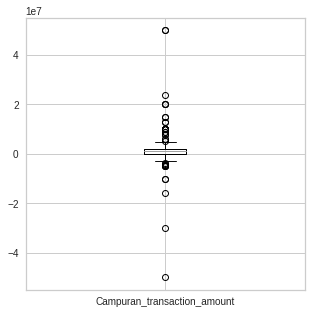

In [15]:
# create visual
campuran_trans.boxplot(column=['Campuran_transaction_amount'],figsize=(5,5))

In [16]:
# IQR calculation
Q1_campuran = campuran_trans['Campuran_transaction_amount'].quantile(0.25)
Q3_campuran = campuran_trans['Campuran_transaction_amount'].quantile(0.75)
IQR_campuran = Q3_campuran - Q1_campuran
lower_fence_campuran = Q1_campuran - 1.5*IQR_campuran
upper_fence_campuran = Q3_campuran + 1.5*IQR_campuran

# call and print the calculation
print('Q1:', Q1_campuran)
print('Q3:', Q3_campuran)
print('IQR:', IQR_campuran)
print('lower fence', lower_fence_campuran)
print('upper fence', upper_fence_campuran)

Q1: -100000.0
Q3: 2000000.0
IQR: 2100000.0
lower fence -3250000.0
upper fence 5150000.0


## **III.  Clean dataset**

**I.  Clean transaction dataset**

In [17]:
# I pick between lower and upper fence of outliers for clean data
df2_outliers = df2[~df2['Saham_transaction_amount'].between(lower_fence_saham, upper_fence_saham) |
                   ~df2['Pasar_Uang_transaction_amount'].between(lower_fence_pasar_uang, upper_fence_pasar_uang) |
                   ~df2['Pendapatan_Tetap_transaction_amount'].between(lower_fence_pendapatan_tetap, upper_fence_pendapatan_tetap) |
                   ~df2['Campuran_transaction_amount'].between(lower_fence_campuran, upper_fence_campuran)]
df2_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 25 to 158397
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              2680 non-null   int64  
 1   date                                 2680 non-null   object 
 2   Saham_AUM                            2680 non-null   float64
 3   Saham_invested_amount                2680 non-null   float64
 4   Saham_transaction_amount             2680 non-null   float64
 5   Pasar_Uang_AUM                       2680 non-null   float64
 6   Pasar_Uang_invested_amount           2680 non-null   float64
 7   Pasar_Uang_transaction_amount        2680 non-null   float64
 8   Pendapatan_Tetap_AUM                 2680 non-null   float64
 9   Pendapatan_Tetap_invested_amount     2680 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  2680 non-null   float64
 11  Campuran_AUM               

In [18]:
# create a list of outliers user id
user_id_outliers = df2_outliers['user_id'].drop_duplicates().values.tolist()
len(user_id_outliers)


1316

In [19]:
# drop outliers from df2 dataset
df2_clean = df2[~df2['user_id'].isin(user_id_outliers)]
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              126452 non-null  int64  
 1   date                                 126452 non-null  object 
 2   Saham_AUM                            126452 non-null  float64
 3   Saham_invested_amount                126452 non-null  float64
 4   Saham_transaction_amount             126452 non-null  float64
 5   Pasar_Uang_AUM                       126452 non-null  float64
 6   Pasar_Uang_invested_amount           126452 non-null  float64
 7   Pasar_Uang_transaction_amount        126452 non-null  float64
 8   Pendapatan_Tetap_AUM                 126452 non-null  float64
 9   Pendapatan_Tetap_invested_amount     126452 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  126452 non-null  float64
 11  Campuran_AUM 

**I.  Clean user dataset**

In [20]:
df1_clean = df1[~df1['user_id'].isin(user_id_outliers)]
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13396 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       13396 non-null  int64 
 1   registration_import_datetime  13396 non-null  object
 2   user_gender                   13396 non-null  object
 3   user_age                      13396 non-null  int64 
 4   user_occupation               13396 non-null  object
 5   user_income_range             13396 non-null  object
 6   referral_code_used            5237 non-null   object
 7   user_income_source            13396 non-null  object
dtypes: int64(2), object(6)
memory usage: 941.9+ KB


# **Data Aggregation**

## **I. Profit**

In [21]:
#choosing end period data of August and September for transaction dataset
profit_eop = df2_clean[(df2_clean['date']=='2021-09-30') | (df2_clean['date']=='2021-08-31')]

#changing date type to datetime
profit_eop['date'] = pd.to_datetime(profit_eop['date'])
profit_eop['date'] = profit_eop['date'].dt.strftime('%Y-%m-%d')
profit_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 1 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   Saham_AUM                            9297 non-null   float64
 3   Saham_invested_amount                9297 non-null   float64
 4   Saham_transaction_amount             9297 non-null   float64
 5   Pasar_Uang_AUM                       9297 non-null   float64
 6   Pasar_Uang_invested_amount           9297 non-null   float64
 7   Pasar_Uang_transaction_amount        9297 non-null   float64
 8   Pendapatan_Tetap_AUM                 9297 non-null   float64
 9   Pendapatan_Tetap_invested_amount     9297 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  9297 non-null   float64
 11  Campuran_AUM                

<ipython-input-21-902e527651e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_eop['date'] = pd.to_datetime(profit_eop['date'])
<ipython-input-21-902e527651e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_eop['date'] = profit_eop['date'].dt.strftime('%Y-%m-%d')


In [22]:
profit_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 1 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   Saham_AUM                            9297 non-null   float64
 3   Saham_invested_amount                9297 non-null   float64
 4   Saham_transaction_amount             9297 non-null   float64
 5   Pasar_Uang_AUM                       9297 non-null   float64
 6   Pasar_Uang_invested_amount           9297 non-null   float64
 7   Pasar_Uang_transaction_amount        9297 non-null   float64
 8   Pendapatan_Tetap_AUM                 9297 non-null   float64
 9   Pendapatan_Tetap_invested_amount     9297 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  9297 non-null   float64
 11  Campuran_AUM                

In [23]:
#calculate profit by the end of periode of august 2021 and september 2021

profit_eop['profit saham'] = profit_eop['Saham_AUM'] - profit_eop['Saham_invested_amount']
profit_eop['profit pasar uang'] = profit_eop['Pasar_Uang_AUM'] - profit_eop['Pasar_Uang_invested_amount']
profit_eop['profit pendapatan tetap'] = profit_eop['Pendapatan_Tetap_AUM'] - profit_eop['Pendapatan_Tetap_invested_amount']
profit_eop['profit campuran'] = profit_eop['Campuran_AUM'] - profit_eop['Campuran_invested_amount']
profit_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 1 to 158810
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   Saham_AUM                            9297 non-null   float64
 3   Saham_invested_amount                9297 non-null   float64
 4   Saham_transaction_amount             9297 non-null   float64
 5   Pasar_Uang_AUM                       9297 non-null   float64
 6   Pasar_Uang_invested_amount           9297 non-null   float64
 7   Pasar_Uang_transaction_amount        9297 non-null   float64
 8   Pendapatan_Tetap_AUM                 9297 non-null   float64
 9   Pendapatan_Tetap_invested_amount     9297 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  9297 non-null   float64
 11  Campuran_AUM                

<ipython-input-23-4726c10f48f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_eop['profit saham'] = profit_eop['Saham_AUM'] - profit_eop['Saham_invested_amount']
<ipython-input-23-4726c10f48f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_eop['profit pasar uang'] = profit_eop['Pasar_Uang_AUM'] - profit_eop['Pasar_Uang_invested_amount']
<ipython-input-23-4726c10f48f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [24]:
profit_eop

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,profit saham,profit pasar uang,profit pendapatan tetap,profit campuran
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,206945.0
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,0.0,-56413.0
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,0.0,0.0,0.0,0.0,839.0,6.0,66.0,0.0
74,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,3179.0,27.0,109.0,0.0
114,61414,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,1625.0,1.0,-131.0,0.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.0,0.0


## **II. Buy, Sell, Net, Frequencies**

In [25]:
#make data copy from df2 (daily user balance)
df2_trx= df2_clean.copy()

In [26]:
#add new monthly datetim to see user activities
df2_trx['date'] = pd.to_datetime(df2_trx['date'])
df2_trx['date'] = df2_trx['date'].dt.strftime('%Y-%m-%d')

In [27]:
#find buy transaction
df2_trx.loc[(df2_trx['Saham_transaction_amount']>0), 'saham buy'] = df2_trx['Saham_transaction_amount']
df2_trx.loc[(df2_trx['Pasar_Uang_transaction_amount']>0), 'pasar uang buy'] = df2_trx['Pasar_Uang_transaction_amount']
df2_trx.loc[(df2_trx['Pendapatan_Tetap_transaction_amount']>0), 'pendapatan tetap buy'] = df2_trx['Pendapatan_Tetap_transaction_amount']
df2_trx.loc[(df2_trx['Campuran_transaction_amount']>0), 'campuran buy'] = df2_trx['Campuran_transaction_amount']

In [28]:
#find sell transaction
df2_trx.loc[(df2_trx['Saham_transaction_amount']<0), 'saham sell'] = df2_trx['Saham_transaction_amount']
df2_trx.loc[(df2_trx['Pasar_Uang_transaction_amount']<0), 'pasar uang sell'] = df2_trx['Pasar_Uang_transaction_amount']
df2_trx.loc[(df2_trx['Pendapatan_Tetap_transaction_amount']<0), 'pendapatan tetap sell'] = df2_trx['Pendapatan_Tetap_transaction_amount']
df2_trx.loc[(df2_trx['Campuran_transaction_amount']<0), 'campuran sell'] = df2_trx['Campuran_transaction_amount']


In [29]:
#find transaction frequencies
df2_trx.loc[(df2_trx['Saham_transaction_amount']> 0) | (df2_trx['Saham_transaction_amount']< 0), 'Freq Saham'] = 1
df2_trx.loc[(df2_trx['Pasar_Uang_transaction_amount']> 0) | (df2_trx['Pasar_Uang_transaction_amount']< 0), 'Freq Pasar Uang'] = 1
df2_trx.loc[(df2_trx['Pendapatan_Tetap_transaction_amount']> 0) | (df2_trx['Pendapatan_Tetap_transaction_amount']< 0), 'Freq Pendapatan Tetap'] = 1
df2_trx.loc[(df2_trx['Campuran_transaction_amount']> 0) | (df2_trx['Campuran_transaction_amount']< 0), 'Freq Campuran'] = 1

In [30]:
#replace null to 0
list_fillna_trx = ['saham buy','saham sell','pasar uang buy','pasar uang sell','pendapatan tetap buy','pendapatan tetap sell','campuran buy','campuran sell','Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran']

df2_trx[list_fillna_trx] = df2_trx[list_fillna_trx].fillna(0)

In [31]:
#find net transaction
df2_trx['net Saham'] = df2_trx['saham buy'] + df2_trx['saham sell']
df2_trx['net pasar uang'] = df2_trx['pasar uang buy'] + df2_trx['pasar uang sell']
df2_trx['net pendapatan tetap'] = df2_trx['pendapatan tetap buy'] + df2_trx['pendapatan tetap sell']
df2_trx['net campuran'] = df2_trx['campuran buy'] + df2_trx['campuran sell']
df2_trx.head(20)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,pendapatan tetap sell,campuran sell,Freq Saham,Freq Pasar Uang,Freq Pendapatan Tetap,Freq Campuran,net Saham,net pasar uang,net pendapatan tetap,net campuran
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50701,2021-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,50701,2021-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,50701,2021-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,50701,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#replace null to 0
list_fillna_trx = ['saham buy','saham sell','pasar uang buy','pasar uang sell','pendapatan tetap buy','pendapatan tetap sell','campuran buy','campuran sell','Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran','net Saham','net pasar uang','net pendapatan tetap','net campuran']

df2_trx[list_fillna_trx] = df2_trx[list_fillna_trx].fillna(0)

In [33]:
daily_insight = df2_trx.groupby(['user_id','date'])[list_fillna_trx].agg('sum').reset_index()

In [34]:
daily_insight.head()

,user_id,date,saham buy,saham sell,pasar uang buy,pasar uang sell,pendapatan tetap buy,pendapatan tetap sell,campuran buy,campuran sell,Freq Saham,Freq Pasar Uang,Freq Pendapatan Tetap,Freq Campuran,net Saham,net pasar uang,net pendapatan tetap,net campuran
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df2_trx[df2_trx['Saham_transaction_amount']>0].head(5)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,pendapatan tetap sell,campuran sell,Freq Saham,Freq Pasar Uang,Freq Pendapatan Tetap,Freq Campuran,net Saham,net pasar uang,net pendapatan tetap,net campuran
154,66145,2021-09-29,248015.0,240000.0,140000.0,29992.0,30000.0,0.0,129929.0,130000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,140000.0,0.0,0.0,0.0
234,72676,2021-09-24,59760.0,59853.0,20613.0,110039.0,110000.0,100000.0,80148.0,80000.0,...,0.0,0.0,1.0,1.0,0.0,0.0,20613.0,100000.0,0.0,0.0
274,82753,2021-08-10,118193.0,120000.0,50000.0,10006.0,10000.0,0.0,19999.0,20000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0
278,82753,2021-08-16,49488.0,50000.0,50000.0,20009.0,20000.0,20000.0,129991.0,130000.0,...,0.0,0.0,1.0,1.0,1.0,0.0,50000.0,20000.0,130000.0,0.0
556,135063,2021-09-27,3811298.0,3760000.0,60000.0,1090960.0,1090000.0,90000.0,5637560.0,5650000.0,...,0.0,0.0,1.0,1.0,1.0,0.0,60000.0,90000.0,350000.0,0.0


## **III. Monthly Insight**

In [36]:
#make data copy from df2 (daily user balance)
df3_trx= df2_clean.copy()

In [37]:
df3_trx = df2_clean[(df2_clean['date']=='2021-09-30') | (df2_clean['date']=='2021-08-31')]

In [38]:
df3_trx['date'] = pd.to_datetime(df3_trx['date'])
df3_trx['date'] = df3_trx['date'].dt.strftime('%Y-%m-%d')

<ipython-input-38-94a26c3f9be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_trx['date'] = pd.to_datetime(df3_trx['date'])
<ipython-input-38-94a26c3f9be5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_trx['date'] = df3_trx['date'].dt.strftime('%Y-%m-%d')


In [39]:
#find buy transaction
df3_trx.loc[(df3_trx['Saham_transaction_amount']>0), 'saham buy'] = df3_trx['Saham_transaction_amount']
df3_trx.loc[(df3_trx['Pasar_Uang_transaction_amount']>0), 'pasar uang buy'] = df3_trx['Pasar_Uang_transaction_amount']
df3_trx.loc[(df3_trx['Pendapatan_Tetap_transaction_amount']>0), 'pendapatan tetap buy'] = df3_trx['Pendapatan_Tetap_transaction_amount']
df3_trx.loc[(df3_trx['Campuran_transaction_amount']>0), 'campuran buy'] = df3_trx['Campuran_transaction_amount']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [40]:
#find sell transaction
df3_trx.loc[(df3_trx['Saham_transaction_amount']<0), 'saham sell'] = df3_trx['Saham_transaction_amount']
df3_trx.loc[(df3_trx['Pasar_Uang_transaction_amount']<0), 'pasar uang sell'] = df3_trx['Pasar_Uang_transaction_amount']
df3_trx.loc[(df3_trx['Pendapatan_Tetap_transaction_amount']<0), 'pendapatan tetap sell'] = df3_trx['Pendapatan_Tetap_transaction_amount']
df3_trx.loc[(df3_trx['Campuran_transaction_amount']<0), 'campuran sell'] = df3_trx['Campuran_transaction_amount']

In [41]:
#find transaction frequencies
df3_trx.loc[(df3_trx['Saham_transaction_amount']> 0) | (df3_trx['Saham_transaction_amount']< 0), 'Freq Saham'] = 1
df3_trx.loc[(df3_trx['Pasar_Uang_transaction_amount']> 0) | (df3_trx['Pasar_Uang_transaction_amount']< 0), 'Freq Pasar Uang'] = 1
df3_trx.loc[(df3_trx['Pendapatan_Tetap_transaction_amount']> 0) | (df3_trx['Pendapatan_Tetap_transaction_amount']< 0), 'Freq Pendapatan Tetap'] = 1
df3_trx.loc[(df3_trx['Campuran_transaction_amount']> 0) | (df3_trx['Campuran_transaction_amount']< 0), 'Freq Campuran'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
df3_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 1 to 158810
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   Saham_AUM                            9297 non-null   float64
 3   Saham_invested_amount                9297 non-null   float64
 4   Saham_transaction_amount             9297 non-null   float64
 5   Pasar_Uang_AUM                       9297 non-null   float64
 6   Pasar_Uang_invested_amount           9297 non-null   float64
 7   Pasar_Uang_transaction_amount        9297 non-null   float64
 8   Pendapatan_Tetap_AUM                 9297 non-null   float64
 9   Pendapatan_Tetap_invested_amount     9297 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  9297 non-null   float64
 11  Campuran_AUM                

In [43]:
#replace null to 0
list_fillna_trx = ['saham buy','saham sell','pasar uang buy','pasar uang sell','pendapatan tetap buy','pendapatan tetap sell','campuran buy','campuran sell','Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran']

df3_trx[list_fillna_trx] = df3_trx[list_fillna_trx].fillna(0)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [44]:
#find net transaction
df3_trx['net Saham'] = df3_trx['saham buy'] + df3_trx['saham sell']
df3_trx['net pasar uang'] = df3_trx['pasar uang buy'] + df3_trx['pasar uang sell']
df3_trx['net pendapatan tetap'] = df3_trx['pendapatan tetap buy'] + df3_trx['pendapatan tetap sell']
df3_trx['net campuran'] = df3_trx['campuran buy'] + df3_trx['campuran sell']
df3_trx.head(20)

<ipython-input-44-651b893b187a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_trx['net Saham'] = df3_trx['saham buy'] + df3_trx['saham sell']
<ipython-input-44-651b893b187a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_trx['net pasar uang'] = df3_trx['pasar uang buy'] + df3_trx['pasar uang sell']
<ipython-input-44-651b893b187a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,pendapatan tetap sell,campuran sell,Freq Saham,Freq Pasar Uang,Freq Pendapatan Tetap,Freq Campuran,net Saham,net pasar uang,net pendapatan tetap,net campuran
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,61414,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,70568,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,72676,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,77578,2021-09-30,443204.0,420000.0,0.0,100121.0,100000.0,0.0,479607.0,480000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#replace null to 0
list_fillna_trx = ['saham buy','saham sell','pasar uang buy','pasar uang sell','pendapatan tetap buy','pendapatan tetap sell','campuran buy','campuran sell','Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran','net Saham','net pasar uang','net pendapatan tetap','net campuran']

df3_trx[list_fillna_trx] = df3_trx[list_fillna_trx].fillna(0)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
monthly_insight = df3_trx.groupby(['user_id','date'])[list_fillna_trx].agg('sum').reset_index()

In [47]:
monthly_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9297 entries, 0 to 9296
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                9297 non-null   int64  
 1   date                   9297 non-null   object 
 2   saham buy              9297 non-null   float64
 3   saham sell             9297 non-null   float64
 4   pasar uang buy         9297 non-null   float64
 5   pasar uang sell        9297 non-null   float64
 6   pendapatan tetap buy   9297 non-null   float64
 7   pendapatan tetap sell  9297 non-null   float64
 8   campuran buy           9297 non-null   float64
 9   campuran sell          9297 non-null   float64
 10  Freq Saham             9297 non-null   float64
 11  Freq Pasar Uang        9297 non-null   float64
 12  Freq Pendapatan Tetap  9297 non-null   float64
 13  Freq Campuran          9297 non-null   float64
 14  net Saham              9297 non-null   float64
 15  net 

## **IV. Combine Dataset**

Merging profit table and insight table

In [48]:
#this is profit end of periode
profit_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 1 to 158810
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   Saham_AUM                            9297 non-null   float64
 3   Saham_invested_amount                9297 non-null   float64
 4   Saham_transaction_amount             9297 non-null   float64
 5   Pasar_Uang_AUM                       9297 non-null   float64
 6   Pasar_Uang_invested_amount           9297 non-null   float64
 7   Pasar_Uang_transaction_amount        9297 non-null   float64
 8   Pendapatan_Tetap_AUM                 9297 non-null   float64
 9   Pendapatan_Tetap_invested_amount     9297 non-null   float64
 10  Pendapatan_Tetap_transaction_amount  9297 non-null   float64
 11  Campuran_AUM                

In [49]:
#this is Insight of daily
daily_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126452 entries, 0 to 126451
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                126452 non-null  int64  
 1   date                   126452 non-null  object 
 2   saham buy              126452 non-null  float64
 3   saham sell             126452 non-null  float64
 4   pasar uang buy         126452 non-null  float64
 5   pasar uang sell        126452 non-null  float64
 6   pendapatan tetap buy   126452 non-null  float64
 7   pendapatan tetap sell  126452 non-null  float64
 8   campuran buy           126452 non-null  float64
 9   campuran sell          126452 non-null  float64
 10  Freq Saham             126452 non-null  float64
 11  Freq Pasar Uang        126452 non-null  float64
 12  Freq Pendapatan Tetap  126452 non-null  float64
 13  Freq Campuran          126452 non-null  float64
 14  net Saham              126452 non-nu

In [50]:
data_merge = monthly_insight.merge(profit_eop, how = 'inner', on = ['user_id','date'])
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   saham buy                            9297 non-null   float64
 3   saham sell                           9297 non-null   float64
 4   pasar uang buy                       9297 non-null   float64
 5   pasar uang sell                      9297 non-null   float64
 6   pendapatan tetap buy                 9297 non-null   float64
 7   pendapatan tetap sell                9297 non-null   float64
 8   campuran buy                         9297 non-null   float64
 9   campuran sell                        9297 non-null   float64
 10  Freq Saham                           9297 non-null   float64
 11  Freq Pasar Uang               

# Data Cleaning


## **I. Removing Irrelevant Values**

In [51]:
#drop transaction amount from each funds
# data_merge_clean = data_merge.drop(columns=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], inplace = True)


In [52]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   saham buy                            9297 non-null   float64
 3   saham sell                           9297 non-null   float64
 4   pasar uang buy                       9297 non-null   float64
 5   pasar uang sell                      9297 non-null   float64
 6   pendapatan tetap buy                 9297 non-null   float64
 7   pendapatan tetap sell                9297 non-null   float64
 8   campuran buy                         9297 non-null   float64
 9   campuran sell                        9297 non-null   float64
 10  Freq Saham                           9297 non-null   float64
 11  Freq Pasar Uang               

## **II. Handling Missing Values**

In [53]:
df1.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [54]:
df2.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

In [55]:
#I fill null value in referral code used by "unused referral" to make it more possible for segmentation
df1_clean["referral_code_used"].fillna("unused referral", inplace = True)
df1

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


## **III. Remove Duplicate Values**

In [56]:
#check for duplicated user dataset
df1_clean.duplicated().sum()

0

In [57]:
##check for duplicated transactions dataset
df2_clean.duplicated().sum()

0

## **IV. Convert Data Types**

In [58]:
#convert user id from int64 to object and date from object to datetime64
daily_insight['user_id'] = daily_insight['user_id'].astype(str)
daily_insight['date'] = pd.to_datetime(daily_insight['date'])
daily_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126452 entries, 0 to 126451
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                126452 non-null  object        
 1   date                   126452 non-null  datetime64[ns]
 2   saham buy              126452 non-null  float64       
 3   saham sell             126452 non-null  float64       
 4   pasar uang buy         126452 non-null  float64       
 5   pasar uang sell        126452 non-null  float64       
 6   pendapatan tetap buy   126452 non-null  float64       
 7   pendapatan tetap sell  126452 non-null  float64       
 8   campuran buy           126452 non-null  float64       
 9   campuran sell          126452 non-null  float64       
 10  Freq Saham             126452 non-null  float64       
 11  Freq Pasar Uang        126452 non-null  float64       
 12  Freq Pendapatan Tetap  126452 non-null  floa

In [59]:
#get dataset info that i want to convert
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              9297 non-null   int64  
 1   date                                 9297 non-null   object 
 2   saham buy                            9297 non-null   float64
 3   saham sell                           9297 non-null   float64
 4   pasar uang buy                       9297 non-null   float64
 5   pasar uang sell                      9297 non-null   float64
 6   pendapatan tetap buy                 9297 non-null   float64
 7   pendapatan tetap sell                9297 non-null   float64
 8   campuran buy                         9297 non-null   float64
 9   campuran sell                        9297 non-null   float64
 10  Freq Saham                           9297 non-null   float64
 11  Freq Pasar Uang               

In [60]:
#convert user id from int64 to object and date from object to datetime64
data_merge['user_id'] = data_merge['user_id'].astype(str)
data_merge['date'] = pd.to_datetime(data_merge['date'])
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              9297 non-null   object        
 1   date                                 9297 non-null   datetime64[ns]
 2   saham buy                            9297 non-null   float64       
 3   saham sell                           9297 non-null   float64       
 4   pasar uang buy                       9297 non-null   float64       
 5   pasar uang sell                      9297 non-null   float64       
 6   pendapatan tetap buy                 9297 non-null   float64       
 7   pendapatan tetap sell                9297 non-null   float64       
 8   campuran buy                         9297 non-null   float64       
 9   campuran sell                        9297 non-null   float64       
 10  Freq Saham  

In [61]:
#convert user id from int64 to object and date from object to datetime64
df2_clean['user_id'] = df2_clean['user_id'].astype(str)
df2_clean['date'] = pd.to_datetime(df2_clean['date'])
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  object        
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_AUM                            126452 non-null  float64       
 3   Saham_invested_amount                126452 non-null  float64       
 4   Saham_transaction_amount             126452 non-null  float64       
 5   Pasar_Uang_AUM                       126452 non-null  float64       
 6   Pasar_Uang_invested_amount           126452 non-null  float64       
 7   Pasar_Uang_transaction_amount        126452 non-null  float64       
 8   Pendapatan_Tetap_AUM                 126452 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     126452 non-null  float64       
 

<ipython-input-61-299e59726a74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['user_id'] = df2_clean['user_id'].astype(str)
<ipython-input-61-299e59726a74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['date'] = pd.to_datetime(df2_clean['date'])


## **V. Data Categorize**

In [62]:
df_user = df1_clean.copy()
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13396 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       13396 non-null  int64 
 1   registration_import_datetime  13396 non-null  object
 2   user_gender                   13396 non-null  object
 3   user_age                      13396 non-null  int64 
 4   user_occupation               13396 non-null  object
 5   user_income_range             13396 non-null  object
 6   referral_code_used            13396 non-null  object
 7   user_income_source            13396 non-null  object
dtypes: int64(2), object(6)
memory usage: 941.9+ KB


In [63]:
# copy user dataset 
df_user = df1_clean.copy()
# drop registration import datetime column because i dont use it in this exercise
df_user.drop(columns='registration_import_datetime', inplace = True)

In [64]:
# categorize user_income_range to make it easy to read for segmentation
# df_user.loc[(df_user['user_income_range']=='> Rp 1 Miliar') | (df_user['user_income_range']=='Rp 100 Juta - 500 Juta') | (df_user['user_income_range']=='Rp 500 Juta - 1 Miliar'), 'user_income_range']= '> Rp 100 Juta'
df_user['user_income_range'] = df_user['user_income_range'].str.replace('> Rp 1 Miliar','> Rp 100 Juta')
df_user['user_income_range'] = df_user['user_income_range'].str.replace('> Rp 500 Juta - 1 Miliar','> Rp 100 Juta')
df_user['user_income_range'] = df_user['user_income_range'].str.replace('> Rp 100 Juta - 500 Juta','> Rp 100 Juta')
df_user['user_income_range'] = df_user['user_income_range'].str.replace('> Rp 100 Juta - 500 Juta','> Rp 100 Juta')
# check user income range value count
df_user['user_income_range'].value_counts()

< 10 Juta                  5959
Rp 10 Juta - 50 Juta       4419
> Rp 50 Juta - 100 Juta    2068
> Rp 100 Juta               950
Name: user_income_range, dtype: int64

In [65]:
# narrow down user occupation category so there is no big gap to each category value
df_user.loc[df_user['user_occupation']=='Pengusaha','user_occupation'] = 'Swasta'
df_user.loc[(df_user['user_occupation']=='TNI/Polisi') | (df_user['user_occupation']=='Guru'), 'user_occupation']= 'PNS'
df_user.loc[(df_user['user_occupation']=='IRT') | (df_user['user_occupation']=='Pensiunan'), 'user_occupation']= 'Others'
# check user occupation value count
df_user['user_occupation'].value_counts()

Pelajar    7229
Swasta     3437
Others     2439
PNS         291
Name: user_occupation, dtype: int64

In [66]:
# narrow down user income source category so there is no big gap to each category value
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Gaji','Pendapatan Sendiri')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Keuntungan Bisnis','Pendapatan Sendiri')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Hasil Investasi','Pendapatan Sendiri')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Tabungan','Pendapatan Sendiri')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Bunga Simpanan','Pendapatan Sendiri')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Dari Orang Tua / Anak','pendapatan dari orang lain')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Dari Suami / istri','pendapatan dari orang lain')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Warisan','pendapatan dari orang lain')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Lainnya','pendapatan lainnya')
df_user['user_income_source'] = df_user['user_income_source'].str.replace('Undian','pendapatan lainnya')
# check user occupation value count
df_user['user_income_source'].value_counts()

Pendapatan Sendiri            10515
pendapatan dari orang lain     1574
pendapatan lainnya             1307
Name: user_income_source, dtype: int64

In [67]:
df_user

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,Female,51,Swasta,> Rp 100 Juta,unused referral,Pendapatan Sendiri
1,3485491,Female,55,Others,> Rp 50 Juta - 100 Juta,unused referral,Pendapatan Sendiri
2,1071649,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused referral,Pendapatan Sendiri
3,3816789,Female,53,Others,> Rp 50 Juta - 100 Juta,unused referral,Pendapatan Sendiri
5,3049927,Male,53,Swasta,< 10 Juta,unused referral,Pendapatan Sendiri
...,...,...,...,...,...,...,...
14707,4352347,Male,49,Swasta,> Rp 100 Juta,unused referral,Pendapatan Sendiri
14708,4288026,Female,49,Swasta,> Rp 100 Juta,unused referral,pendapatan lainnya
14709,4286882,Female,49,Swasta,> Rp 100 Juta,unused referral,pendapatan dari orang lain
14710,4396739,Male,49,Swasta,> Rp 100 Juta,unused referral,Pendapatan Sendiri


## **VI. Handling Outliers**

**I. User age outliers**

In [68]:
# copy df_user data 
outliers = df_user.copy()
# check df_user info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13396 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             13396 non-null  int64 
 1   user_gender         13396 non-null  object
 2   user_age            13396 non-null  int64 
 3   user_occupation     13396 non-null  object
 4   user_income_range   13396 non-null  object
 5   referral_code_used  13396 non-null  object
 6   user_income_source  13396 non-null  object
dtypes: int64(2), object(5)
memory usage: 837.2+ KB


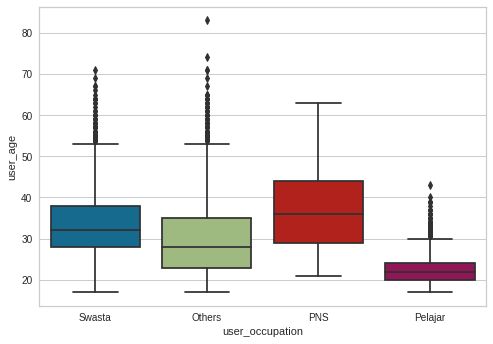

In [69]:
sns.boxplot(data = df_user, x = 'user_occupation', y = 'user_age')

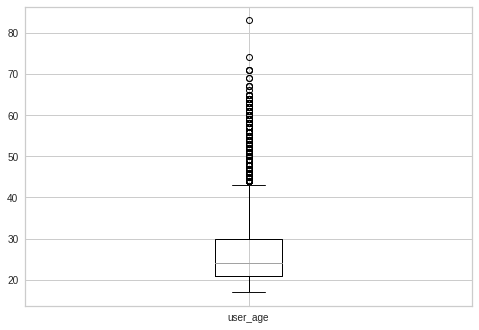

In [70]:
# check user age outliers
df_user[['user_age']].boxplot()

# Descriptive Statistic

## **I. Total User**

In [71]:
# for total users, I clean users data set from transaction amount outliers

distinct_user = df_user.drop_duplicates('user_id')
distinct_user['user_id'].count()

13396

## **II. Behavioural differences**

### **I. Gender ratio**

In [72]:
df_gender = distinct_user['user_gender'].value_counts().reset_index()
df_gender

,index,user_gender
0,Male,8215
1,Female,5181


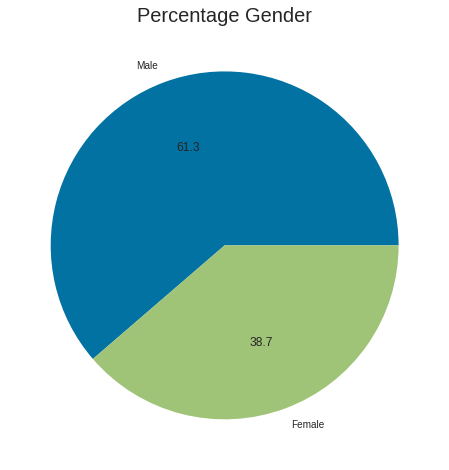

In [73]:
plt.figure(figsize =(8,8))
plt.pie(df_gender['user_gender'], labels = df_gender['index'],autopct='%.1f')
plt.title('Percentage Gender', fontsize = 20)
plt.show()

### **II. Age distribution**

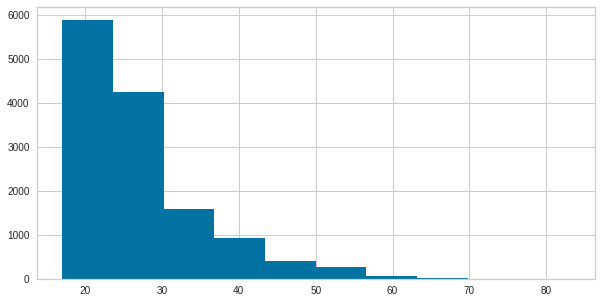

In [74]:
distinct_user['user_age'].hist(figsize=(10,5))

### **III. Income Range**

In [75]:
df_income_range = distinct_user['user_income_range'].value_counts().reset_index()
df_income_range

,index,user_income_range
0,< 10 Juta,5959
1,Rp 10 Juta - 50 Juta,4419
2,> Rp 50 Juta - 100 Juta,2068
3,> Rp 100 Juta,950


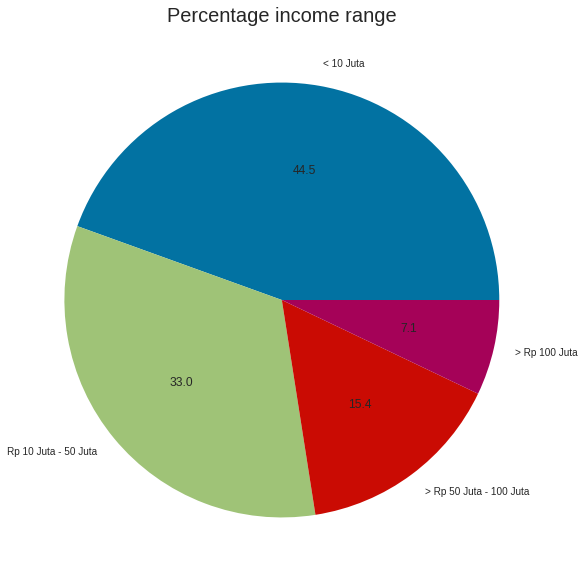

In [76]:
plt.figure(figsize =(10,10))
plt.pie(df_income_range['user_income_range'], labels = df_income_range['index'],autopct='%.1f')
plt.title('Percentage income range', fontsize = 20)
plt.show()

### **IV. Income Source**

In [77]:
df_income_source = df_user['user_income_source'].value_counts().reset_index()
df_income_source

,index,user_income_source
0,Pendapatan Sendiri,10515
1,pendapatan dari orang lain,1574
2,pendapatan lainnya,1307


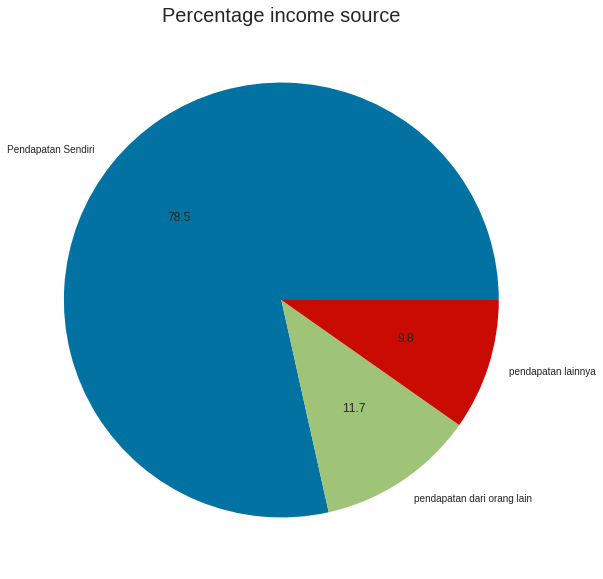

In [78]:
plt.figure(figsize =(10,10))
plt.pie(df_income_source['user_income_source'], labels = df_income_source['index'],autopct='%.1f')
plt.title('Percentage income source', fontsize = 20)
plt.show()

### **V. Occupation**

In [79]:
df_occupation = df_user['user_occupation'].value_counts().reset_index()
df_occupation

,index,user_occupation
0,Pelajar,7229
1,Swasta,3437
2,Others,2439
3,PNS,291


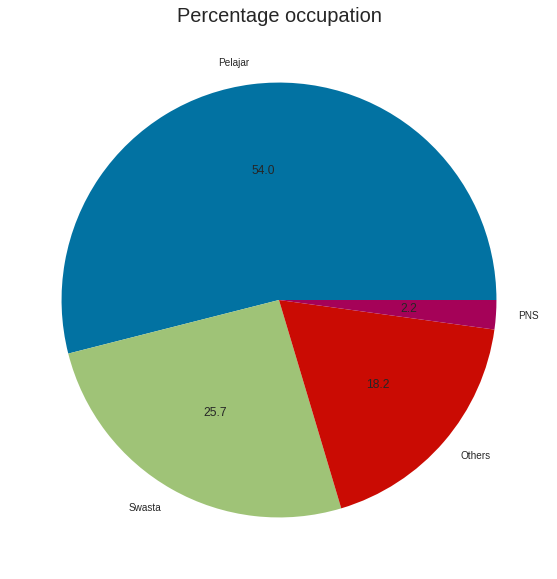

In [80]:
plt.figure(figsize =(10,10))
plt.pie(df_occupation['user_occupation'], labels = df_occupation['index'],autopct='%.1f')
plt.title('Percentage occupation', fontsize = 20)
plt.show()

## **IV. Average AUM per product**

In [81]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              9297 non-null   object        
 1   date                                 9297 non-null   datetime64[ns]
 2   saham buy                            9297 non-null   float64       
 3   saham sell                           9297 non-null   float64       
 4   pasar uang buy                       9297 non-null   float64       
 5   pasar uang sell                      9297 non-null   float64       
 6   pendapatan tetap buy                 9297 non-null   float64       
 7   pendapatan tetap sell                9297 non-null   float64       
 8   campuran buy                         9297 non-null   float64       
 9   campuran sell                        9297 non-null   float64       
 10  Freq Saham  

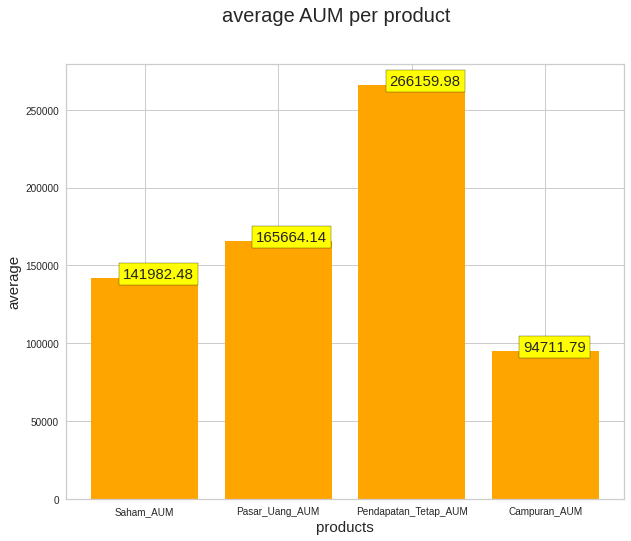

In [82]:
#make a list for each products AUM
products = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']
#calculate each products AUM average
avgAUM = data_merge[products].mean()
#create visual for prudcts AUM average
figsize = plt.figure(figsize = (10,8))
figsize.suptitle('average AUM per product', fontsize = 20)
plt.xlabel('products', fontsize = 15)
plt.ylabel('average', fontsize = 15)
for i, v in enumerate(avgAUM):
  AUM = round(v,2)
  plt.text(i - 0.165, v, str(AUM), fontsize=15, bbox=dict(facecolor='yellow', alpha = 1))
plt.bar(products, avgAUM, color=('orange'))
plt.show()




## **V. User transaction frequencies**

In [83]:
daily_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126452 entries, 0 to 126451
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                126452 non-null  object        
 1   date                   126452 non-null  datetime64[ns]
 2   saham buy              126452 non-null  float64       
 3   saham sell             126452 non-null  float64       
 4   pasar uang buy         126452 non-null  float64       
 5   pasar uang sell        126452 non-null  float64       
 6   pendapatan tetap buy   126452 non-null  float64       
 7   pendapatan tetap sell  126452 non-null  float64       
 8   campuran buy           126452 non-null  float64       
 9   campuran sell          126452 non-null  float64       
 10  Freq Saham             126452 non-null  float64       
 11  Freq Pasar Uang        126452 non-null  float64       
 12  Freq Pendapatan Tetap  126452 non-null  floa

In [84]:
# # # make a dataframe copy
edafr=daily_insight.copy()
# make a list for each products transaction frequencies
list_freq = ['Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran']
# sum of the products transaction frequencies
edafr = edafr[list_freq].sum()
edafr

Freq Saham               3131.0
Freq Pasar Uang          3786.0
Freq Pendapatan Tetap    3335.0
Freq Campuran              60.0
dtype: float64

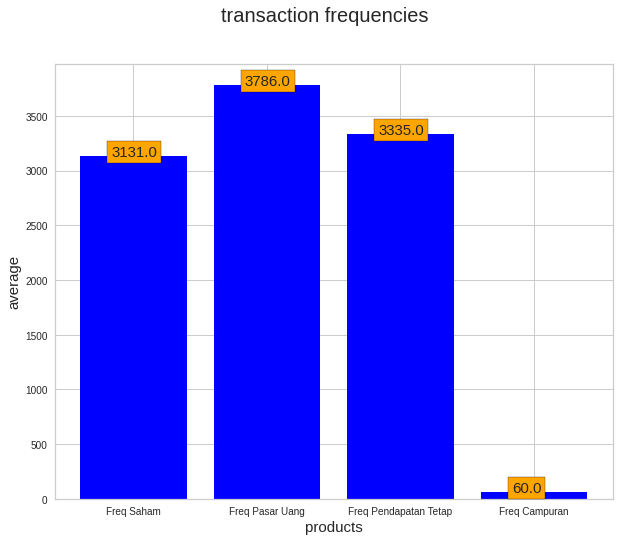

In [85]:

#create visual for products transaction frequencies
figsize = plt.figure(figsize = (10,8))
figsize.suptitle('transaction frequencies', fontsize = 20)
plt.xlabel('products', fontsize = 15)
plt.ylabel('average', fontsize = 15)
for t, u in enumerate(edafr):
  freq = round(u,2)
  plt.text(t - 0.165, u, str(freq), fontsize=15, bbox=dict(facecolor='orange', alpha = 1))
plt.bar(list_freq, edafr, color=('blue'))
plt.show()

## **VI. Average monthly buy/sell per customer**

In [86]:
#create new data fram to get average monthly buy/sell per customer
eda4=data_merge[['user_id','saham buy','saham sell','pasar uang buy','pasar uang sell','pendapatan tetap buy','pendapatan tetap sell','campuran buy','campuran sell']]
eda4avg=eda4.groupby(['user_id']).mean()
eda4avg

,saham buy,saham sell,pasar uang buy,pasar uang sell,pendapatan tetap buy,pendapatan tetap sell,campuran buy,campuran sell
user_id,,,,,,,,
1004326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
981852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
988940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **VII. Average profit per user**

In [87]:
#create new data fram to get average profit per user
eda5=data_merge[['user_id','profit saham','profit pasar uang','profit pendapatan tetap','profit campuran',]]
eda5avg=eda5.groupby(['user_id']).mean()
eda5avg

,profit saham,profit pasar uang,profit pendapatan tetap,profit campuran
user_id,,,,
1004326,2887.0,43.5,461.5,0.0
1005053,3729.0,2.0,-60.0,0.0
1005165,330.0,44.0,149.0,0.0
1023627,1856.0,0.0,0.0,0.0
1024581,0.0,0.0,0.0,0.0
...,...,...,...,...
981852,0.0,132.0,0.0,0.0
984729,0.0,5.0,12.0,0.0
988940,1610.0,353.0,-26.0,0.0


## **VIII. Transactions Frequencies Trend**

In [88]:
insight = daily_insight.copy()

In [89]:
insight['Date Daily'] = insight['date'].dt.strftime('%j').astype(int)
insight['Date Week'] = insight['date'].dt.week
insight['Date Month'] = insight['date'].dt.month

<ipython-input-89-dac217cd8fe0>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  insight['Date Week'] = insight['date'].dt.week


<ipython-input-90-02d11a0b4894>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  freq_trend = insight.groupby('Date Daily')['Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran'].sum().reset_index()


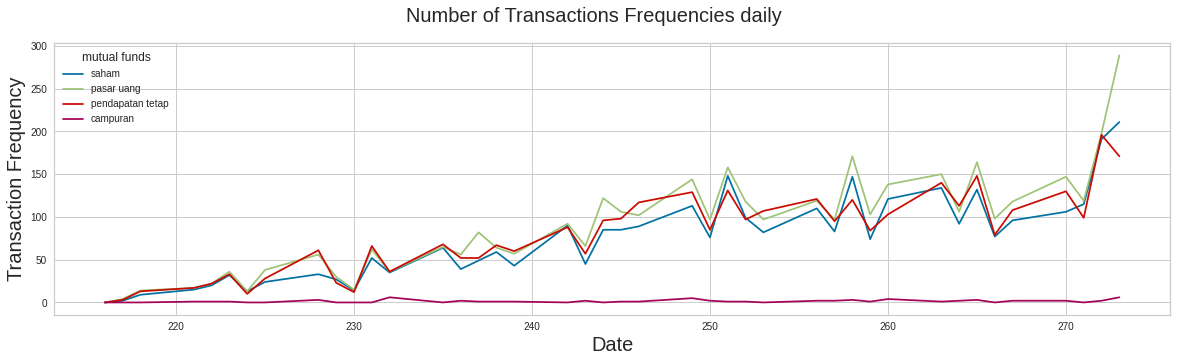

In [90]:
# DAILY TIME SERIES
#create list of freq transaction for y axis in visualization for daily time series
freq_trend = insight.groupby('Date Daily')['Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran'].sum().reset_index()
list_freq1 = ['Freq Saham']
list_freq2 = ['Freq Pasar Uang']
list_freq3 = ['Freq Pendapatan Tetap']
list_freq4 = ['Freq Campuran']

# create the visualization of the data
fig = plt.figure(figsize=(20, 5)) #to set the figure size

fig.suptitle('Number of Transactions Frequencies daily', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date', fontsize=20) # to set the axis title and its font size
plt.ylabel('Transaction Frequency', fontsize=20)  # to set the axis title and its font size

freq1 = freq_trend[list_freq1] # load the data to be used for that axis
freq2 = freq_trend[list_freq2]
freq3 = freq_trend[list_freq3]
freq4 = freq_trend[list_freq4]
x = freq_trend['Date Daily'] # load the data to be used for that axis

plt.plot(x, freq1, label = 'saham')
plt.plot(x, freq2,label = 'pasar uang')
plt.plot(x, freq3, label = 'pendapatan tetap')
plt.plot(x, freq4, label = 'campuran') # to plot and select the line colour
plt.legend(title = 'mutual funds')
# plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

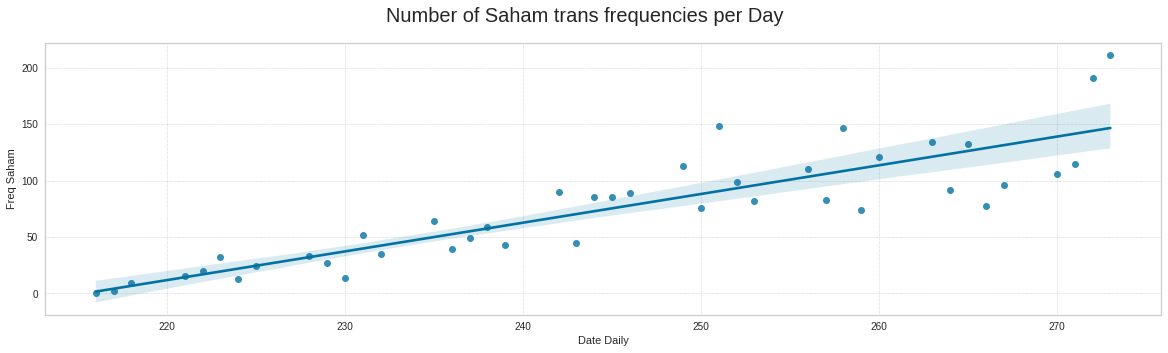

In [91]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of Saham trans frequencies per Day', fontsize=20)
# plt.xlabel('Day', fontsize=20)
# plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = freq_trend, x = 'Date Daily', y = 'Freq Saham')
plt.show()

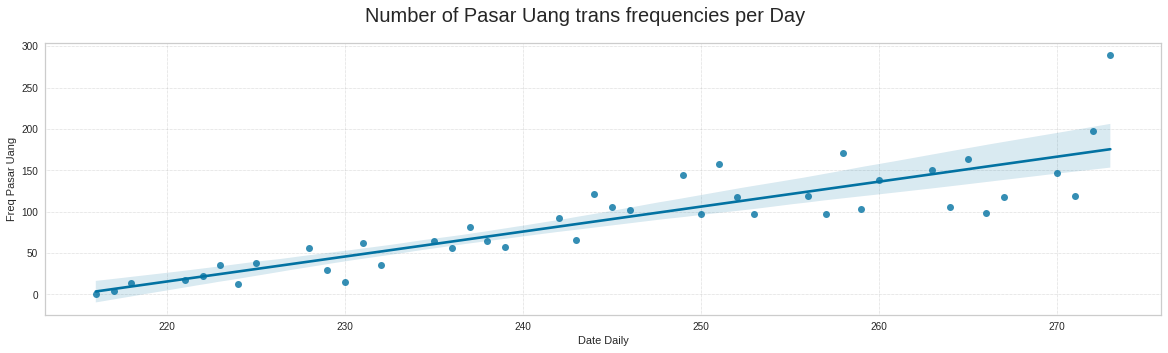

In [92]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of Pasar Uang trans frequencies per Day', fontsize=20)
# plt.xlabel('Day', fontsize=20)
# plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = freq_trend, x = 'Date Daily', y = 'Freq Pasar Uang')
plt.show()

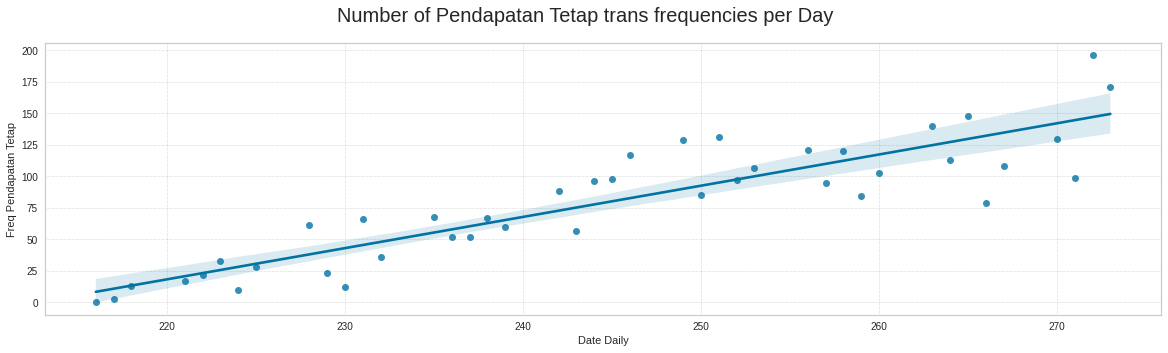

In [93]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of Pendapatan Tetap trans frequencies per Day', fontsize=20)
# plt.xlabel('Day', fontsize=20)
# plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = freq_trend, x = 'Date Daily', y = 'Freq Pendapatan Tetap')
plt.show()

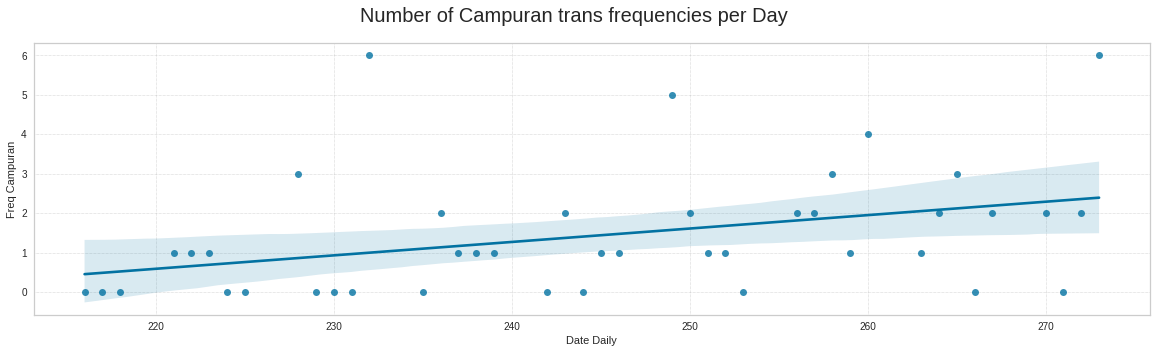

In [94]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of Campuran trans frequencies per Day', fontsize=20)
# plt.xlabel('Day', fontsize=20)
# plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = freq_trend, x = 'Date Daily', y = 'Freq Campuran')
plt.show()

## **IX. Transactions Sum Trend**

In [95]:
weekly_insight = df2_clean.copy()

In [96]:
#create new column for weekly and monthly for visualize time series
weekly_insight['Date Daily'] = weekly_insight['date'].dt.strftime('%j').astype(int)
weekly_insight['Date Week'] = weekly_insight['date'].dt.week
weekly_insight['Date Month'] = weekly_insight['date'].dt.month
weekly_insight.info()
weekly_insight.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  object        
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_AUM                            126452 non-null  float64       
 3   Saham_invested_amount                126452 non-null  float64       
 4   Saham_transaction_amount             126452 non-null  float64       
 5   Pasar_Uang_AUM                       126452 non-null  float64       
 6   Pasar_Uang_invested_amount           126452 non-null  float64       
 7   Pasar_Uang_transaction_amount        126452 non-null  float64       
 8   Pendapatan_Tetap_AUM                 126452 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     126452 non-null  float64       
 

<ipython-input-96-fc9c641d872b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_insight['Date Week'] = weekly_insight['date'].dt.week


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Date Daily,Date Week,Date Month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,242,35,8
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,243,35,8
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,244,35,9
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,245,35,9
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,246,35,9


<ipython-input-97-1464dc9d427b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_trend_daily = weekly_insight.groupby('Date Daily')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()


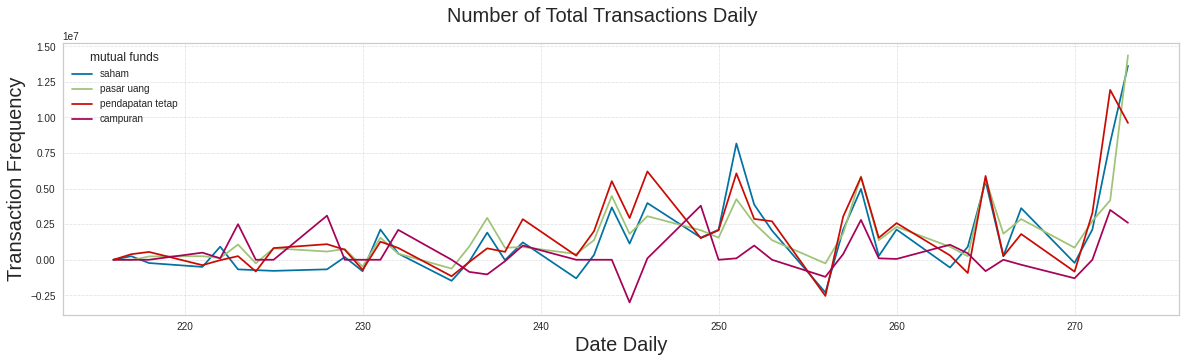

In [97]:
# DAILY TIME SERIES
#create list for y axis in visualization for daily time series
sum_trend_daily = weekly_insight.groupby('Date Daily')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()
list_sum1 = ['Saham_transaction_amount']
list_sum2 = ['Pasar_Uang_transaction_amount']
list_sum3 = ['Pendapatan_Tetap_transaction_amount']
list_sum4 = ['Campuran_transaction_amount']

# DAILY TIME SERIES
# create the visualization of the data
fig = plt.figure(figsize=(20, 5)) #to set the figure size

fig.suptitle('Number of Total Transactions Daily', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date Daily', fontsize=20) # to set the axis title and its font size
plt.ylabel('Transaction Frequency', fontsize=20)  # to set the axis title and its font size

sum1 = sum_trend_daily[list_sum1] # load the data to be used for that axis
sum2 = sum_trend_daily[list_sum2]
sum3 = sum_trend_daily[list_sum3]
sum4 = sum_trend_daily[list_sum4]
x = sum_trend_daily['Date Daily'] # load the data to be used for that axis

plt.plot(x, sum1, label = 'saham')
plt.plot(x, sum2,label = 'pasar uang')
plt.plot(x, sum3, label = 'pendapatan tetap')
plt.plot(x, sum4, label = 'campuran') # to plot and select the line colour
plt.legend(title = 'mutual funds')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

<ipython-input-98-cd0ae7112056>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_trend_weekly = weekly_insight.groupby('Date Week')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()


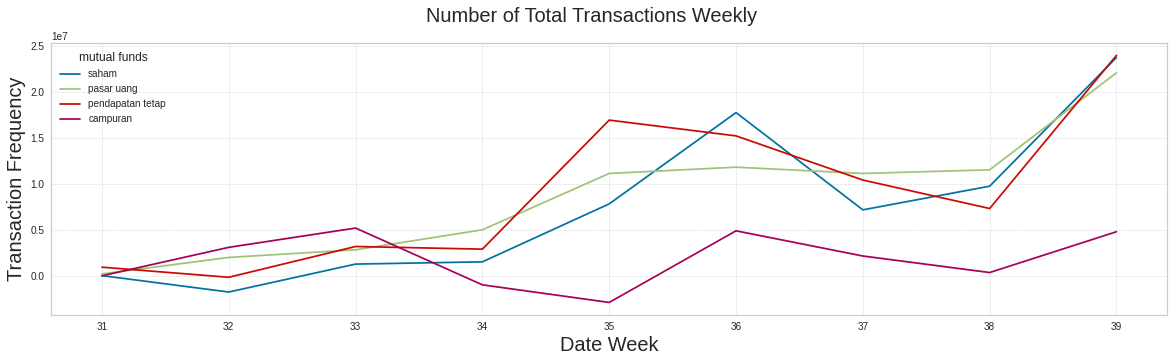

In [98]:
# WEEKLY TIME SERIES
#create list for y axis in visualization for weekly time series
sum_trend_weekly = weekly_insight.groupby('Date Week')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()
list_sum1 = ['Saham_transaction_amount']
list_sum2 = ['Pasar_Uang_transaction_amount']
list_sum3 = ['Pendapatan_Tetap_transaction_amount']
list_sum4 = ['Campuran_transaction_amount']

# create the visualization of the data
fig = plt.figure(figsize=(20, 5)) #to set the figure size

fig.suptitle('Number of Total Transactions Weekly', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date Week', fontsize=20) # to set the axis title and its font size
plt.ylabel('Transaction Frequency', fontsize=20)  # to set the axis title and its font size

sum1 = sum_trend_weekly[list_sum1] # load the data to be used for that axis
sum2 = sum_trend_weekly[list_sum2]
sum3 = sum_trend_weekly[list_sum3]
sum4 = sum_trend_weekly[list_sum4]
x = sum_trend_weekly['Date Week'] # load the data to be used for that axis

plt.plot(x, sum1, label = 'saham')
plt.plot(x, sum2,label = 'pasar uang')
plt.plot(x, sum3, label = 'pendapatan tetap')
plt.plot(x, sum4, label = 'campuran') # to plot and select the line colour
plt.legend(title = 'mutual funds')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

<ipython-input-99-2b473d5a97e8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_trend_monthly = weekly_insight.groupby('Date Month')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()


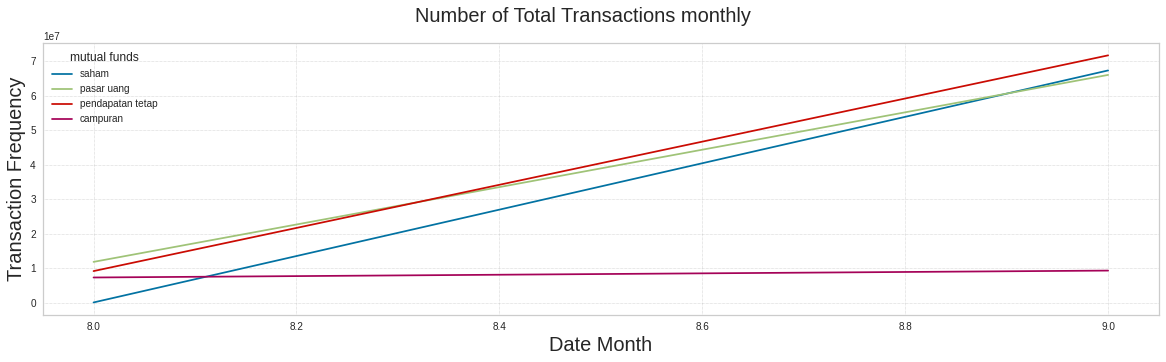

In [99]:
# MONTHLY TIME SERIES
#create list for y axis in visualization for monthly time series
sum_trend_monthly = weekly_insight.groupby('Date Month')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()
list_sum1 = ['Saham_transaction_amount']
list_sum2 = ['Pasar_Uang_transaction_amount']
list_sum3 = ['Pendapatan_Tetap_transaction_amount']
list_sum4 = ['Campuran_transaction_amount']

# create the visualization of the data
fig = plt.figure(figsize=(20, 5)) #to set the figure size

fig.suptitle('Number of Total Transactions monthly', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date Month', fontsize=20) # to set the axis title and its font size
plt.ylabel('Transaction Frequency', fontsize=20)  # to set the axis title and its font size

sum1 = sum_trend_monthly[list_sum1] # load the data to be used for that axis
sum2 = sum_trend_monthly[list_sum2]
sum3 = sum_trend_monthly[list_sum3]
sum4 = sum_trend_monthly[list_sum4]
x = sum_trend_monthly['Date Month'] # load the data to be used for that axis

plt.plot(x, sum1, label = 'saham')
plt.plot(x, sum2,label = 'pasar uang')
plt.plot(x, sum3, label = 'pendapatan tetap')
plt.plot(x, sum4, label = 'campuran') # to plot and select the line colour
plt.legend(title = 'mutual funds')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show() # to show the chart

In [100]:
sum_trend_daily1 = weekly_insight.groupby('Date Daily')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()

<ipython-input-100-7c12e27a3c43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_trend_daily1 = weekly_insight.groupby('Date Daily')['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()


**Saham total transactions trendline**



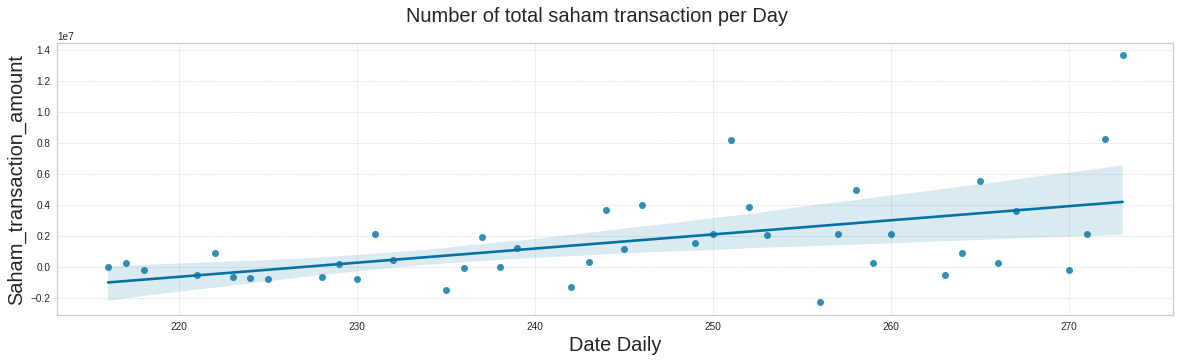

In [101]:
#create reggression trendline to conlude if it is increasing or decreasing
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of total saham transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = sum_trend_daily1, x = 'Date Daily', y = 'Saham_transaction_amount')
plt.show()

**Pasar Uang total transactions trendline**

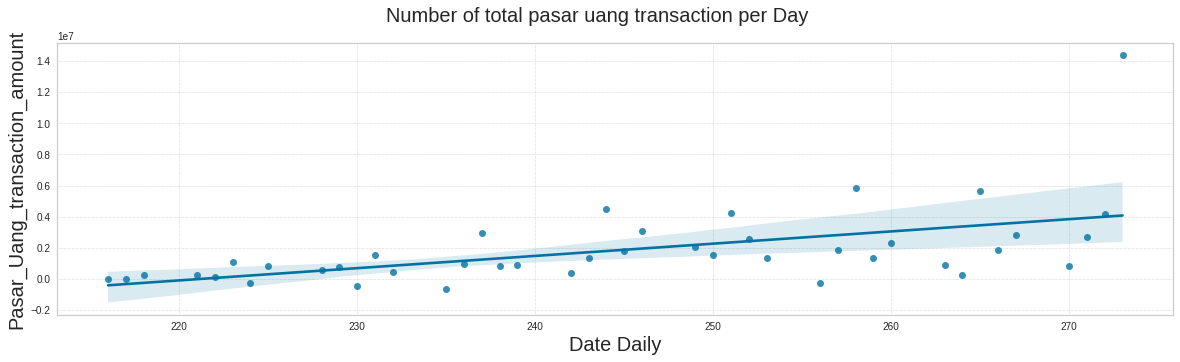

In [102]:
#create reggression trendline to conlude if it is increasing or decreasing
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of total pasar uang transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = sum_trend_daily1, x = 'Date Daily', y = 'Pasar_Uang_transaction_amount')
plt.show()

**Pendapatan tetap total transactions trendline**

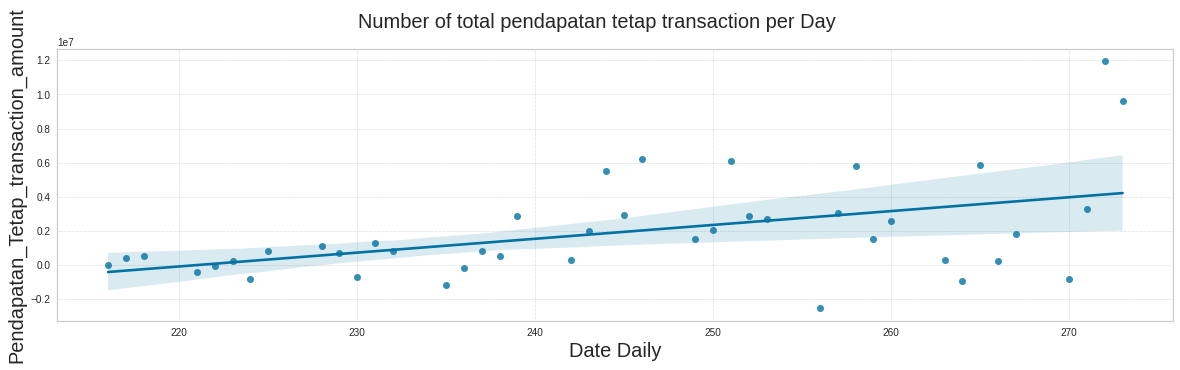

In [103]:
#create reggression trendline to conlude if it is increasing or decreasing
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of total pendapatan tetap transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = sum_trend_daily1, x = 'Date Daily', y = 'Pendapatan_Tetap_transaction_amount')
plt.show()

**Campuran total transactions trendline**

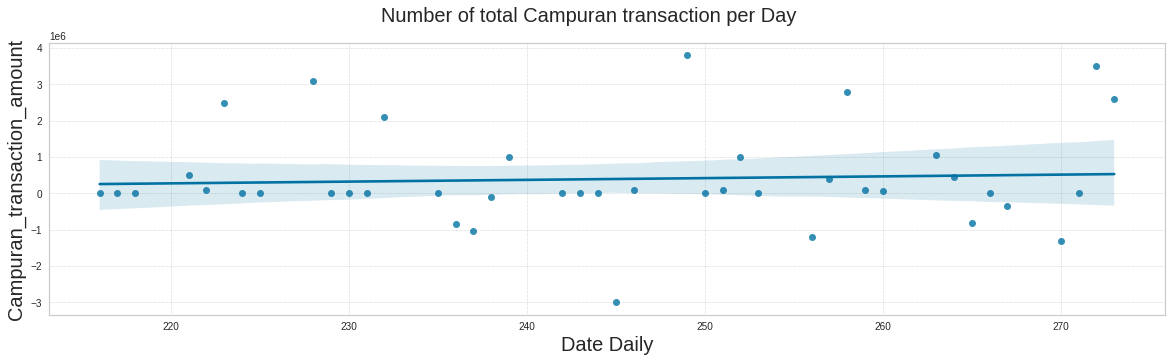

In [104]:
 #create reggression trendline to conlude if it is increasing or decreasing
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Number of total Campuran transaction per Day', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('saham trans', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.regplot(data = sum_trend_daily1, x = 'Date Daily', y = 'Campuran_transaction_amount')
plt.show()

# Clustering

In [105]:
#create data frame
cluster1 = df2_clean.copy()

In [106]:
# We Group the data to see unique user characteristics (number of transactions and the amount)
cluster1 = cluster1.groupby('user_id')['Saham_transaction_amount','Pasar_Uang_transaction_amount',
                                  'Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum().reset_index()


cluster1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              6961 non-null   object 
 1   Saham_transaction_amount             6961 non-null   float64
 2   Pasar_Uang_transaction_amount        6961 non-null   float64
 3   Pendapatan_Tetap_transaction_amount  6961 non-null   float64
 4   Campuran_transaction_amount          6961 non-null   float64
dtypes: float64(4), object(1)
memory usage: 272.0+ KB


<ipython-input-106-5955ec25f7d5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster1 = cluster1.groupby('user_id')['Saham_transaction_amount','Pasar_Uang_transaction_amount',


In [107]:
#get total transaction of 4 mutual funds
cluster1['Total Transactions'] = cluster1['Saham_transaction_amount'] + cluster1['Pasar_Uang_transaction_amount'] + cluster1['Pendapatan_Tetap_transaction_amount'] + cluster1['Campuran_transaction_amount']
cluster1 = cluster1[['user_id', 'Total Transactions']]
cluster1.head()

,user_id,Total Transactions
0,1004326,0.0
1,1005053,0.0
2,1005165,0.0
3,1023627,0.0
4,1024581,-100000.0


In [108]:
df2_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              126452 non-null  int64  
 1   date                                 126452 non-null  object 
 2   Saham_AUM                            126452 non-null  float64
 3   Saham_invested_amount                126452 non-null  float64
 4   Saham_transaction_amount             126452 non-null  float64
 5   Pasar_Uang_AUM                       126452 non-null  float64
 6   Pasar_Uang_invested_amount           126452 non-null  float64
 7   Pasar_Uang_transaction_amount        126452 non-null  float64
 8   Pendapatan_Tetap_AUM                 126452 non-null  float64
 9   Pendapatan_Tetap_invested_amount     126452 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  126452 non-null  float64
 11  Campuran_AUM 

In [109]:
#get total frequencies of 4 mutual funds
group1 = df2_trx.groupby('user_id')['Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran'].sum().reset_index()
group1['Total Freq'] = group1['Freq Saham'] + group1['Freq Pasar Uang'] + group1['Freq Pendapatan Tetap'] + group1['Freq Campuran']
group1 = group1[['user_id', 'Total Freq']]
group1.head()

<ipython-input-109-07b344dedf72>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group1 = df2_trx.groupby('user_id')['Freq Saham','Freq Pasar Uang','Freq Pendapatan Tetap','Freq Campuran'].sum().reset_index()


,user_id,Total Freq
0,50701,0.0
1,53759,0.0
2,61414,1.0
3,66145,1.0
4,70568,0.0


In [110]:
#convert user id datatype from int64 to object(string)
cluster1['user_id'] = cluster1['user_id'].astype(str)
df2_trx['user_id'] = df2_trx['user_id'].astype(str)
df_user['user_id'] = df_user['user_id'].astype(str)

In [111]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13396 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             13396 non-null  object
 1   user_gender         13396 non-null  object
 2   user_age            13396 non-null  int64 
 3   user_occupation     13396 non-null  object
 4   user_income_range   13396 non-null  object
 5   referral_code_used  13396 non-null  object
 6   user_income_source  13396 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [112]:
#merge total transaction to transaction data frame
cluster_trans = cluster1.merge(df_user, how = 'inner', on = 'user_id')\
           .merge(df2_trx, how = 'inner', on = 'user_id')\
          
cluster_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 126451
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              126452 non-null  object 
 1   Total Transactions                   126452 non-null  float64
 2   user_gender                          126452 non-null  object 
 3   user_age                             126452 non-null  int64  
 4   user_occupation                      126452 non-null  object 
 5   user_income_range                    126452 non-null  object 
 6   referral_code_used                   126452 non-null  object 
 7   user_income_source                   126452 non-null  object 
 8   date                                 126452 non-null  object 
 9   Saham_AUM                            126452 non-null  float64
 10  Saham_invested_amount                126452 non-null  float64
 11  Saham_transac

In [113]:
cluster_trans.info()
group1['user_id'] = group1['user_id'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 126451
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              126452 non-null  object 
 1   Total Transactions                   126452 non-null  float64
 2   user_gender                          126452 non-null  object 
 3   user_age                             126452 non-null  int64  
 4   user_occupation                      126452 non-null  object 
 5   user_income_range                    126452 non-null  object 
 6   referral_code_used                   126452 non-null  object 
 7   user_income_source                   126452 non-null  object 
 8   date                                 126452 non-null  object 
 9   Saham_AUM                            126452 non-null  float64
 10  Saham_invested_amount                126452 non-null  float64
 11  Saham_transac

In [114]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     6961 non-null   object 
 1   Total Freq  6961 non-null   float64
dtypes: float64(1), object(1)
memory usage: 108.9+ KB


In [115]:
#merge total transaction and total transaction frequencies to user dataframe
cluster_user = df_user.merge(cluster1, how='inner',on='user_id')\
           .merge(group1, how='inner', on='user_id')
cluster_user.head()

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Total Transactions,Total Freq
0,3816789,Female,53,Others,> Rp 50 Juta - 100 Juta,unused referral,Pendapatan Sendiri,100000.0,1.0
1,3049927,Male,53,Swasta,< 10 Juta,unused referral,Pendapatan Sendiri,149000.0,1.0
2,3836491,Male,59,Others,< 10 Juta,used referral,pendapatan lainnya,0.0,0.0
3,3718933,Male,50,Swasta,> Rp 100 Juta,unused referral,Pendapatan Sendiri,0.0,0.0
4,3820160,Female,58,Others,> Rp 50 Juta - 100 Juta,used referral,pendapatan dari orang lain,105000.0,3.0


In [116]:
cluster_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6960
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             6961 non-null   object 
 1   user_gender         6961 non-null   object 
 2   user_age            6961 non-null   int64  
 3   user_occupation     6961 non-null   object 
 4   user_income_range   6961 non-null   object 
 5   referral_code_used  6961 non-null   object 
 6   user_income_source  6961 non-null   object 
 7   Total Transactions  6961 non-null   float64
 8   Total Freq          6961 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 543.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc700026550>,
      dtype=object)

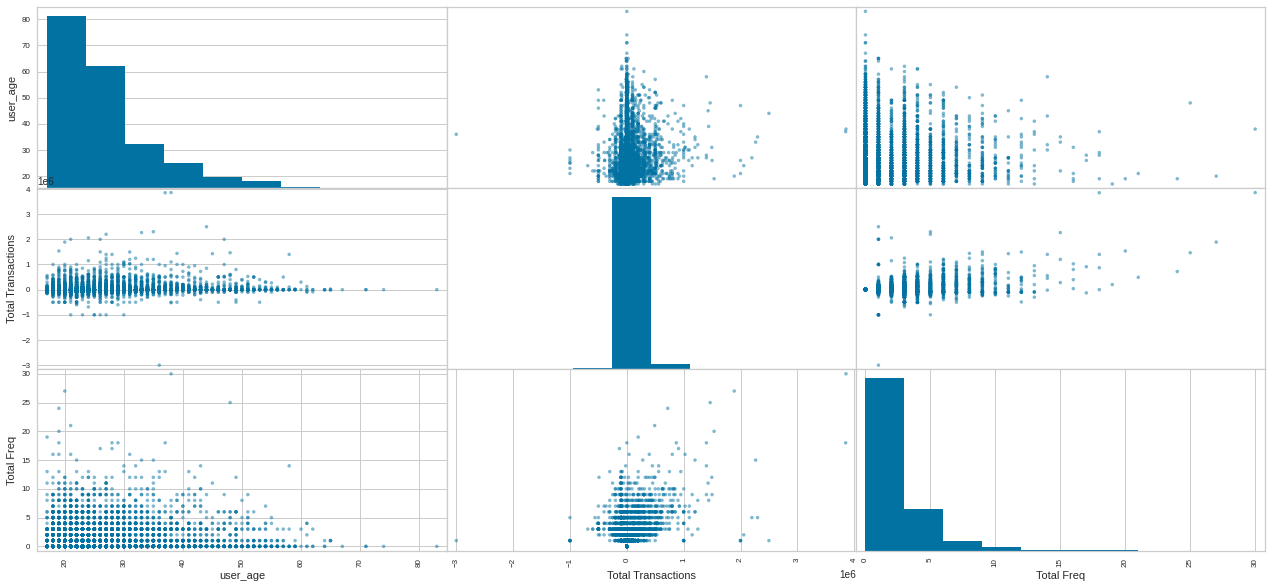

In [117]:
# Let's explore the data using matrix of scatter plots
# Can you see some concentration of data in the plot?
from pandas.plotting import scatter_matrix
scatter_matrix(cluster_user, figsize = (22,10))

Encoding

In [118]:
df_encode = cluster_user.copy()

In [119]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6960
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             6961 non-null   object 
 1   user_gender         6961 non-null   object 
 2   user_age            6961 non-null   int64  
 3   user_occupation     6961 non-null   object 
 4   user_income_range   6961 non-null   object 
 5   referral_code_used  6961 non-null   object 
 6   user_income_source  6961 non-null   object 
 7   Total Transactions  6961 non-null   float64
 8   Total Freq          6961 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 543.8+ KB


In [120]:
df_encode = df_encode.loc[~((df_encode['Total Transactions'] == 0) & (df_encode['Total Freq'] == 0))]

In [121]:
df_encode.loc[(df_encode['user_income_range']== '< 10 Juta'), 'Income Range'] = 1
df_encode.loc[(df_encode['user_income_range']== 'Rp 10 Juta - 50 Juta'), 'Income Range'] = 2
df_encode.loc[(df_encode['user_income_range']== '> Rp 50 Juta - 100 Juta'), 'Income Range'] = 3
df_encode.loc[(df_encode['user_income_range']== '> Rp 100 Juta'), 'Income Range'] = 4

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [122]:
df_encode['Income Range'].value_counts()


1.0    1677
2.0    1163
3.0     491
4.0     172
Name: Income Range, dtype: int64

In [123]:
#list categorize, numerical to use for clustering and list drop column if we dont want to use it
categorize_column = ['user_occupation','user_income_source','referral_code_used']
numerical_column = ['user_age','Total Transactions','Total Freq','Income Range']
drop_column = ['user_gender','user_occupation','user_income_source','referral_code_used','user_income_range']
mylist = ['user_age',
 'Total Transactions',
 'Total Freq',
 'Income Range',
 'user_occupation_Others',
 'user_occupation_PNS',
 'user_occupation_Pelajar',
 'user_occupation_Swasta',
 'user_income_source_Pendapatan Sendiri',
 'user_income_source_pendapatan dari orang lain',
 'user_income_source_pendapatan lainnya',
 'referral_code_used_unused referral',
 'referral_code_used_used referral']

In [124]:
dum_df = pd.get_dummies(df_encode, columns=categorize_column, prefix=categorize_column)
df_encode = df_encode.merge(dum_df)
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        3503 non-null   object 
 1   user_gender                                    3503 non-null   object 
 2   user_age                                       3503 non-null   int64  
 3   user_occupation                                3503 non-null   object 
 4   user_income_range                              3503 non-null   object 
 5   referral_code_used                             3503 non-null   object 
 6   user_income_source                             3503 non-null   object 
 7   Total Transactions                             3503 non-null   float64
 8   Total Freq                                     3503 non-null   float64
 9   Income Range                                   3503 

In [125]:
df_cluster1 = df_encode.copy()

In [126]:
#drop unused column
df_cluster1.drop(columns = drop_column,inplace = True)

In [127]:
df_cluster1.info()
clusterlist = df_cluster1.columns.values.tolist()
clusterlist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        3503 non-null   object 
 1   user_age                                       3503 non-null   int64  
 2   Total Transactions                             3503 non-null   float64
 3   Total Freq                                     3503 non-null   float64
 4   Income Range                                   3503 non-null   float64
 5   user_occupation_Others                         3503 non-null   uint8  
 6   user_occupation_PNS                            3503 non-null   uint8  
 7   user_occupation_Pelajar                        3503 non-null   uint8  
 8   user_occupation_Swasta                         3503 non-null   uint8  
 9   user_income_source_Pendapatan Sendiri          3503 

['user_id',
 'user_age',
 'Total Transactions',
 'Total Freq',
 'Income Range',
 'user_occupation_Others',
 'user_occupation_PNS',
 'user_occupation_Pelajar',
 'user_occupation_Swasta',
 'user_income_source_Pendapatan Sendiri',
 'user_income_source_pendapatan dari orang lain',
 'user_income_source_pendapatan lainnya',
 'referral_code_used_unused referral',
 'referral_code_used_used referral']

Test

In [128]:
df_cluster = df_cluster1.copy()
#user minmaxscaler
scaler = MinMaxScaler()

df_cluster[numerical_column] = scaler.fit_transform(df_cluster1[numerical_column])


In [129]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        3503 non-null   object 
 1   user_age                                       3503 non-null   float64
 2   Total Transactions                             3503 non-null   float64
 3   Total Freq                                     3503 non-null   float64
 4   Income Range                                   3503 non-null   float64
 5   user_occupation_Others                         3503 non-null   uint8  
 6   user_occupation_PNS                            3503 non-null   uint8  
 7   user_occupation_Pelajar                        3503 non-null   uint8  
 8   user_occupation_Swasta                         3503 non-null   uint8  
 9   user_income_source_Pendapatan Sendiri          3503 

In [130]:
from sklearn.cluster import KMeans

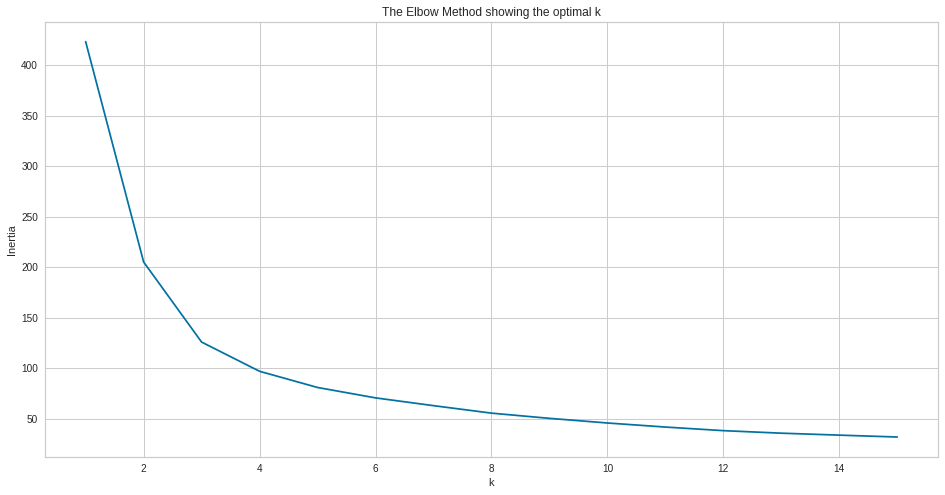

[423.22487660307263, 205.09870231795543, 125.78750880832057, 96.85568416202231, 80.82926402467812, 70.52991636638771, 62.82928877743264, 55.42231115826418, 50.262620475870506, 45.66507505141958, 41.6450551548843, 38.081776806085394, 35.57284714640995, 33.64181827664008, 31.764459333296834]


In [131]:

# elbow method
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++')
    kmeanModel.fit(df_cluster[numerical_column])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

For n_clusters = 2 The average silhouette_score is : 0.5400866157621572
For n_clusters = 3 The average silhouette_score is : 0.5106679295422875
For n_clusters = 4 The average silhouette_score is : 0.5294502867337746
For n_clusters = 5 The average silhouette_score is : 0.5390059789056458
For n_clusters = 6 The average silhouette_score is : 0.5467168160538584
For n_clusters = 7 The average silhouette_score is : 0.5361167507023495
For n_clusters = 8 The average silhouette_score is : 0.4775799325875334
For n_clusters = 9 The average silhouette_score is : 0.455566821474948


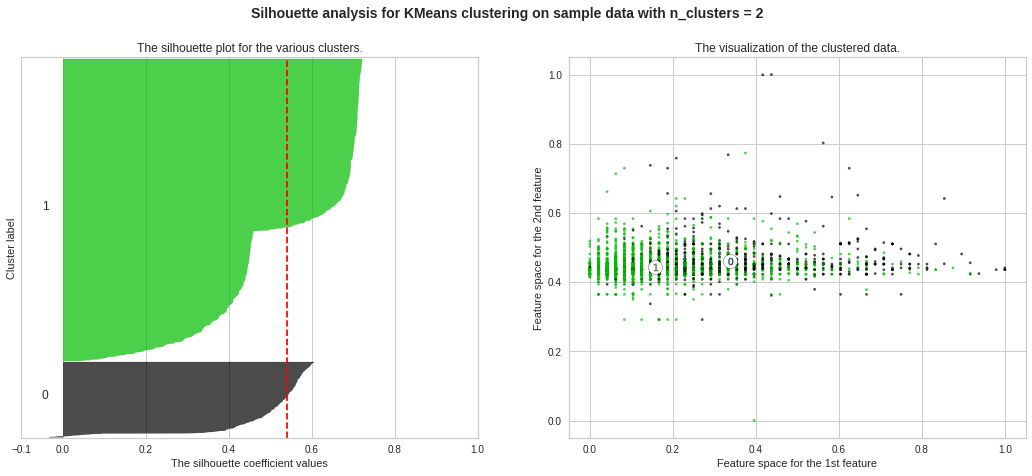

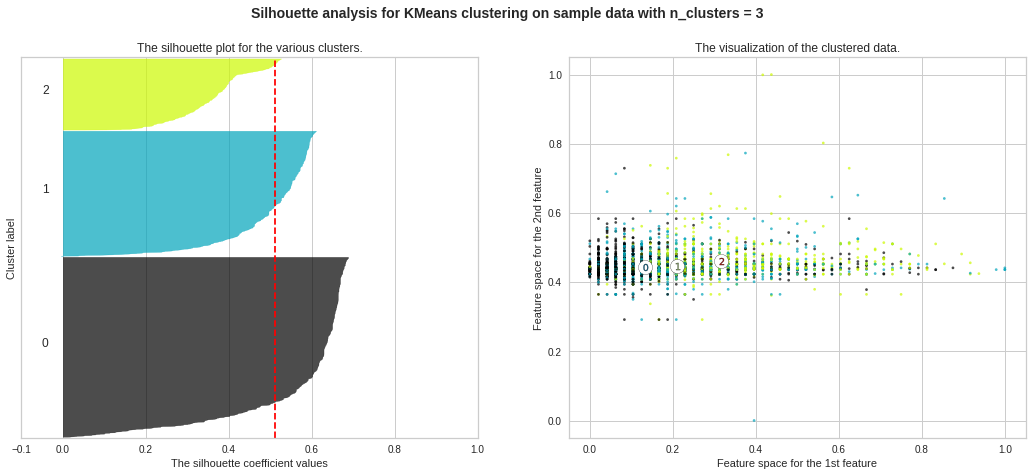

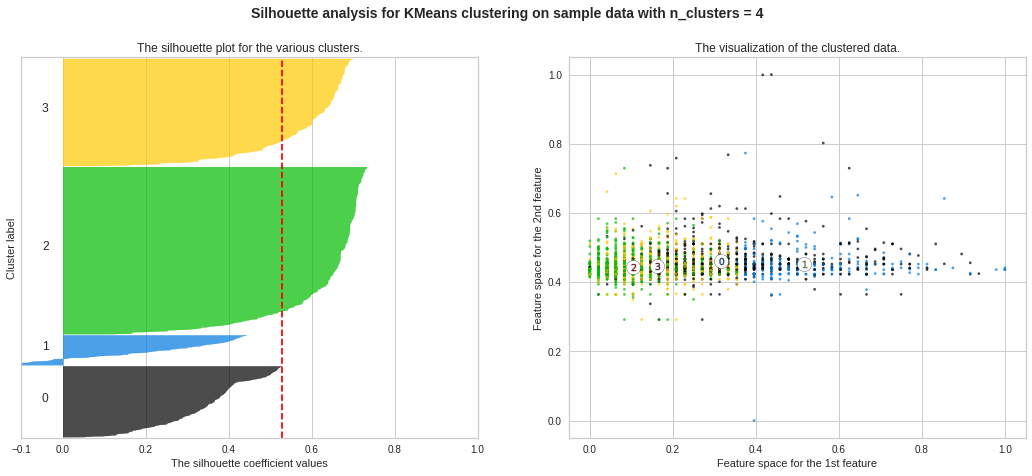

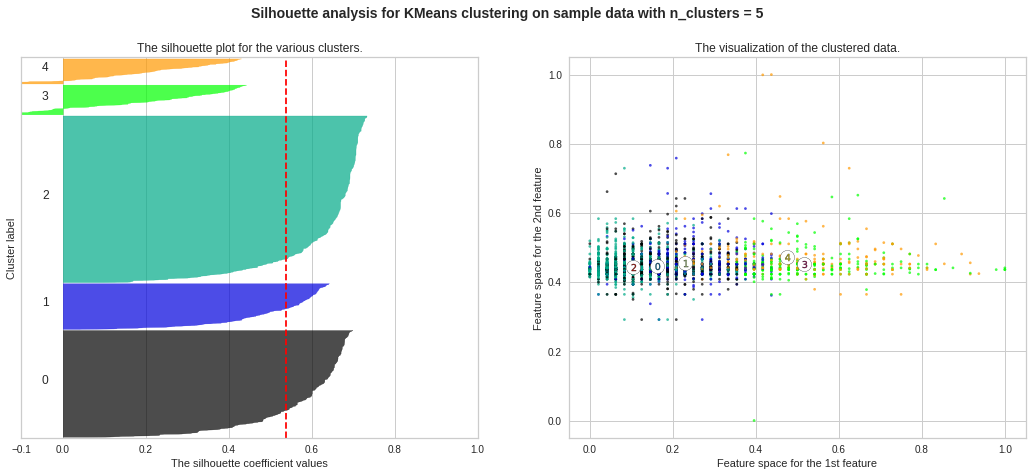

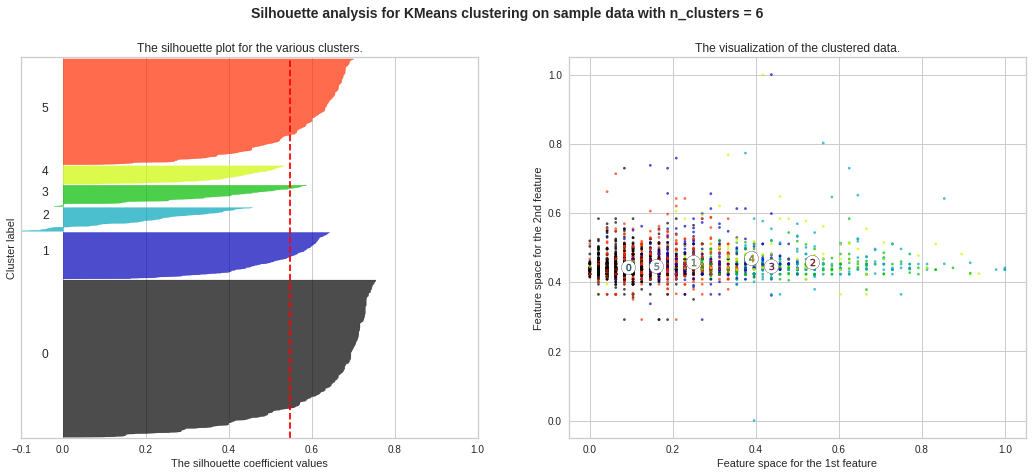

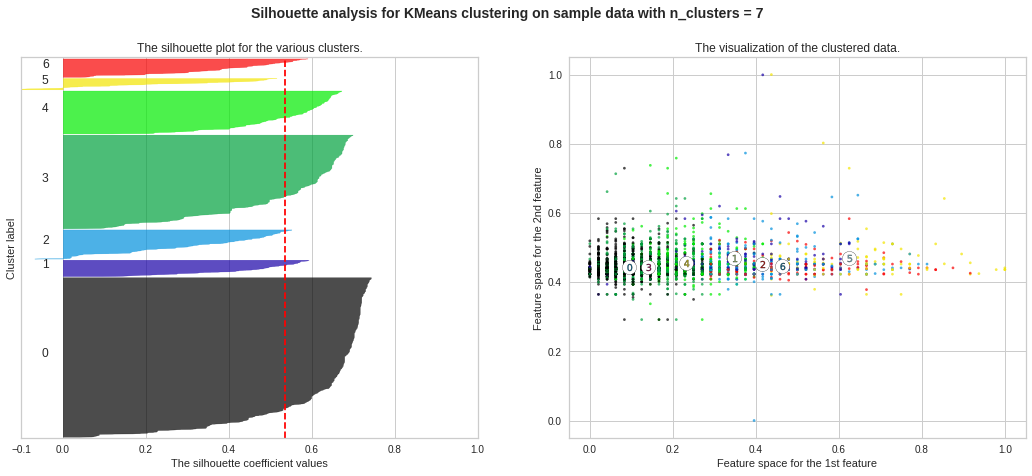

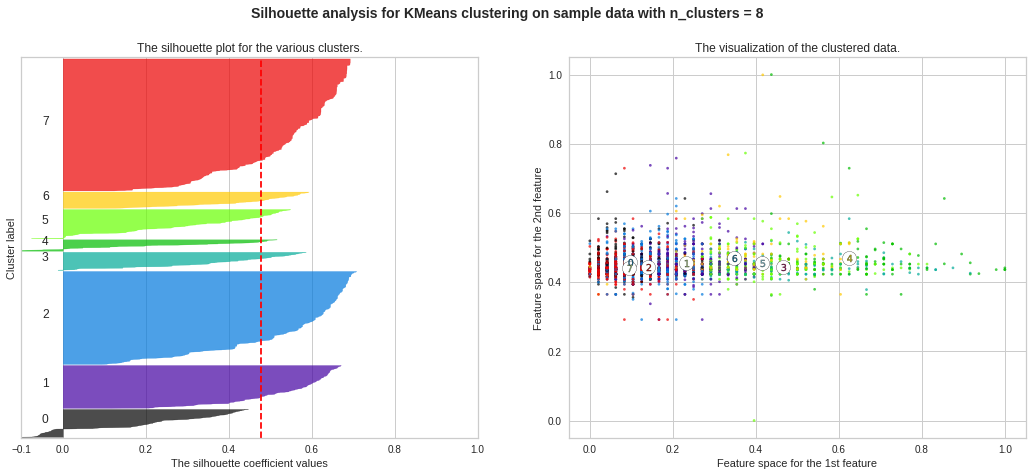

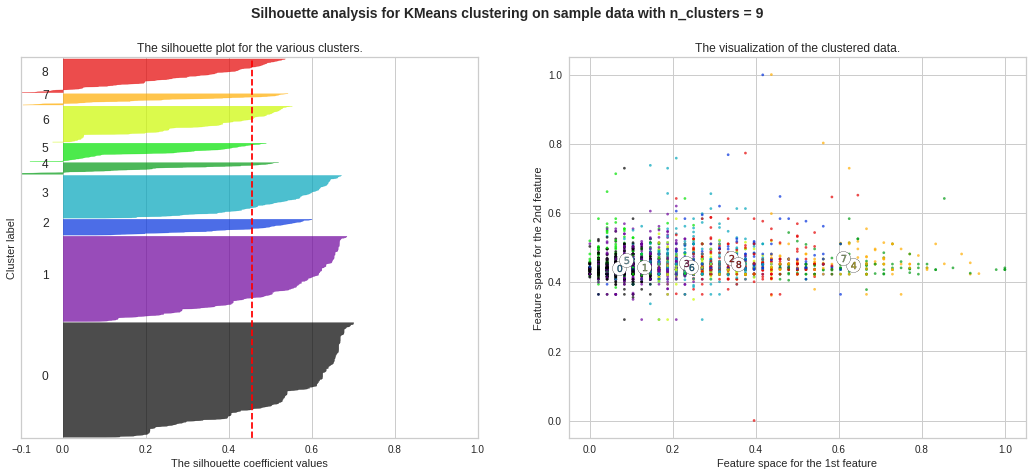

In [132]:
silhoutte_analysis(df_cluster[numerical_column],list(range(2,10)))

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [134]:
# implement clustering Kmeans dengan N Cluster = 3
cluster_model = cluster.KMeans(n_clusters=3, random_state = 42)
cluster_model.fit(df_cluster[numerical_column])
cluster_label = cluster_model.labels_
df_cluster1['cluster'] = cluster_label
df_cluster1

,user_id,user_age,Total Transactions,Total Freq,Income Range,user_occupation_Others,user_occupation_PNS,user_occupation_Pelajar,user_occupation_Swasta,user_income_source_Pendapatan Sendiri,user_income_source_pendapatan dari orang lain,user_income_source_pendapatan lainnya,referral_code_used_unused referral,referral_code_used_used referral,cluster
0,3816789,53,100000.0,1.0,3.0,1,0,0,0,1,0,0,1,0,2
1,3049927,53,149000.0,1.0,1.0,0,0,0,1,1,0,0,1,0,1
2,3820160,58,105000.0,3.0,3.0,1,0,0,0,0,1,0,0,1,2
3,3770075,54,10000.0,1.0,1.0,0,0,0,1,1,0,0,1,0,1
4,3759446,57,-12000.0,1.0,1.0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3993275,49,10000.0,1.0,3.0,0,1,0,0,1,0,0,0,1,2
3499,3773859,49,-100000.0,12.0,4.0,0,0,0,1,0,0,1,1,0,2
3500,3798265,49,-100000.0,4.0,2.0,1,0,0,0,1,0,0,0,1,0
3501,3670811,49,240000.0,6.0,3.0,0,0,0,1,1,0,0,1,0,2


In [135]:
df_cluster1.groupby('cluster')['user_age','Income Range','Total Transactions','Total Freq'].agg(['count','min','max','mean','median'])

<ipython-input-135-7879066196ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cluster1.groupby('cluster')['user_age','Income Range','Total Transactions','Total Freq'].agg(['count','min','max','mean','median'])


user_age                           Income Range                      \
           count min max       mean median        count  min  max      mean   
cluster                                                                       
0           1164  17  65  27.081615   25.0         1164  1.0  2.0  1.999141   
1           1676  17  59  23.359785   21.0         1676  1.0  1.0  1.000000   
2            663  17  62  32.215686   30.0          663  3.0  4.0  3.259427   

               Total Transactions                                       \
        median              count        min        max           mean   
cluster                                                                  
0          2.0               1164 -3000000.0  2300000.0   65041.539519   
1          1.0               1676 -1000000.0  2000000.0   35005.019690   
2          3.0                663 -1000000.0  3855536.0  163316.532428   

                  Total Freq                              
           median      count  min   max      mean median  
cluster                                                   
0         10000.0       1164  1.0  27.0  2.929553    2.0  
1             0.0       1676  1.0  24.0  2.894988    2.0  
2        100000.0        663  1.0  30.0  3.092006    3.0